### The structure of the graphs to compare experiments will be changed to increase readability

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [24]:
class accuracies:
    def __init__(self):
        try:
            with open("pickles/acc_without_pca.p",'rb') as f:
                self.experiment1, self.experiment2, self.experiment3, self.experiment4 = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_with_pca.p",'rb') as f:
                self.experiment5, self.experiment6, self.experiment7, self.experiment8 = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_with_svd.p",'rb') as f:
                self.experiment9, self.experiment10, self.experiment11, self.experiment12 = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_ensemble_pca.p",'rb') as f:
                self.experiment14 = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_autoencoder_logit_30.p",'rb') as f:
                self.experimentList30 = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_autoencoder_logit_30_a_denoising.p",'rb') as f:
                self.experimentList30_a_denoising = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_autoencoder_logit_30_z_denoising.p",'rb') as f:
                self.experimentList30_z_denoising = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_autoencoder_logit_30_a_z_denoising.p",'rb') as f:
                self.experimentList30_a_z_denoising = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_autoencoder_logit_50.p",'rb') as f:
                self.experimentList50 = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_autoencoder_logit_50_a_denoising.p",'rb') as f:
                self.experimentList50_a_denoising = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_autoencoder_logit_50_z_denoising.p",'rb') as f:
                self.experimentList50_z_denoising = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_autoencoder_logit_50_a_z_denoising.p",'rb') as f:
                self.experimentList50_a_z_denoising = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_autoencoder_logit_70.p",'rb') as f:
                self.experimentList70 = pickle.load(f)
        except EOFError as e:
            print(e) 
        try:
            with open("pickles/acc_autoencoder_logit_70_a_denoising.p",'rb') as f:
                self.experimentList70_a_denoising = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_autoencoder_logit_70_z_denoising.p",'rb') as f:
                self.experimentList70_z_denoising = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_autoencoder_logit_70_a_z_denoising.p",'rb') as f:
                self.experimentList70_a_z_denoising = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_autoencoder_logit_ensemble.p",'rb') as f:
                self.acc_autoencoder_logit_ensemble = pickle.load(f)
        except EOFError as e:
            print(e)
        try:
            with open("pickles/acc_autoencoder_logit_10.p",'rb') as f:
                self.experimentList10 = pickle.load(f)
        except EOFError as e:
            print(e)
            
            

In [25]:
a = accuracies()

In [4]:
def comparisonGraph(exp1, exp2):
    ## Assume that y1 is overall better than y2 (we will sort by y1)
    y1 = exp1.getMaxTestResults()-50
    y2 = exp2.getMaxTestResults()-50
    m1 = exp1.getTestAccuracy(max=True)-50
    m2 = exp2.getTestAccuracy(max=True)-50
    ms1 = exp1.getTestAccuracyMinusSigma(max=True)-50
    ms2 = exp2.getTestAccuracyMinusSigma(max=True)-50
    st = np.asarray(exp1.stocks)

    mpl_fig = plt.figure()
    ax = mpl_fig.add_subplot(111)
    N = len(y1)
    x = np.arange(N)
    width = 0.5

    # sort in descending order according to y1
    argsort1 = y1.argsort()[::-1]
    #argsort2 = y2.argsort()[::-1]
    y1 = y1[argsort1]
    y2 = y2[argsort1]
    st = st[argsort1]

    # plot barcharts
    p1 = ax.bar(x, y1, width, color=(0.2588,0.4433,1.0),alpha=1)
    p2 = ax.bar(x, y2, width, color=(1.0,0.5,0.62),alpha=0.6) # add a little transparency to the red

    #  add horizontal lines for mean and mean-std
    p3 = plt.axhline(y=m1, color='b', linestyle='-')
    p4 = plt.axhline(y=m2, color='r', linestyle='-')
    p5 = plt.axhline(y=ms1, color='b', linestyle='-.')
    p6 = plt.axhline(y=ms2, color='r', linestyle='-.')

    # add legend
    plt.legend([p1, p2, p3, p5, p4, p6], [exp1.methodName, exp2.methodName,"mean","mean-std","mean","mean-std"])

    # take care of range and labels
    mini=int(min(y1.min(),y2.min()))+50
    maxi=int(max(y1.max(),y2.max()))+51
    labels = np.arange(mini,maxi)
    _ = ax.set_yticklabels(labels)
    _ = plt.ylim([mini-50, maxi-50])
    _ = ax.set_xticklabels(st,rotation=90)
    _ = plt.xticks(x)
    plt.show()



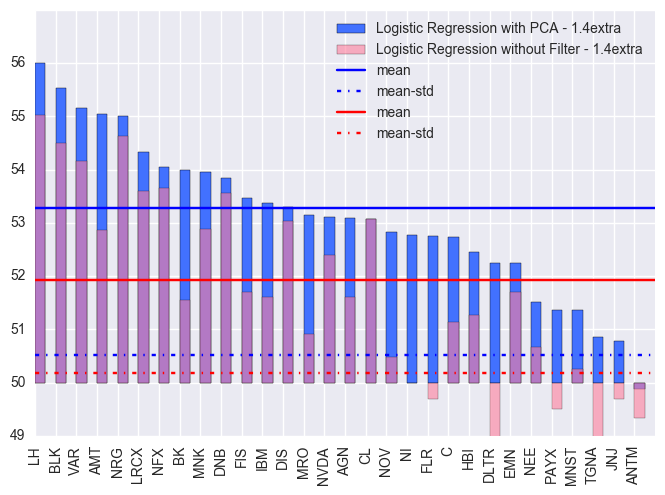

In [5]:
comparisonGraph(a.experiment7,a.experiment3)

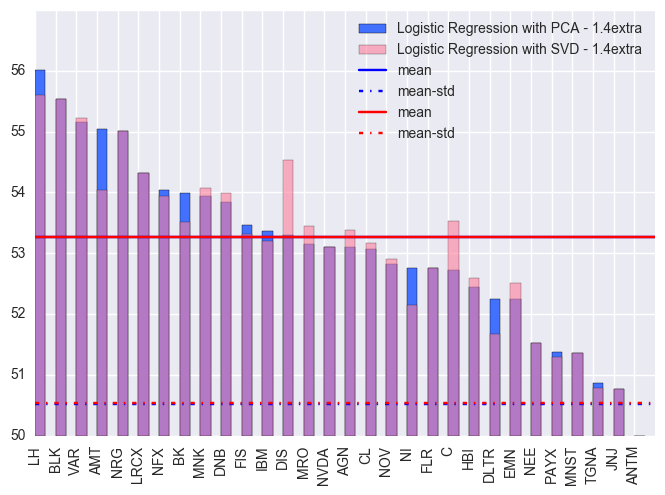

In [6]:
comparisonGraph(a.experiment7,a.experiment11)

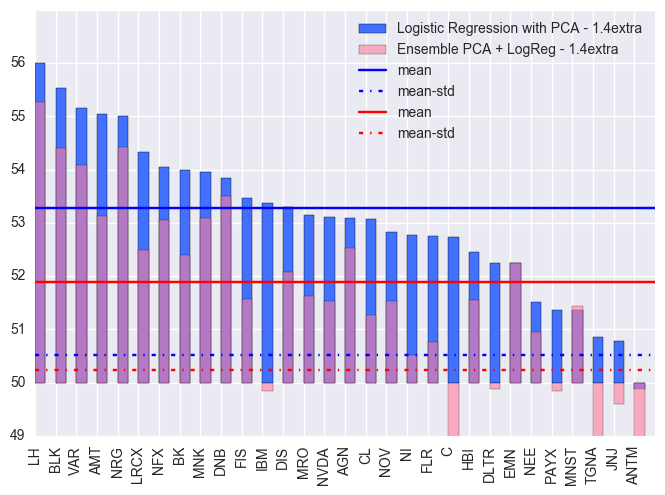

In [7]:
comparisonGraph(a.experiment7,a.experiment14)

# Comparison of Autoencoders for different learning parameters
## Autoencoder 30

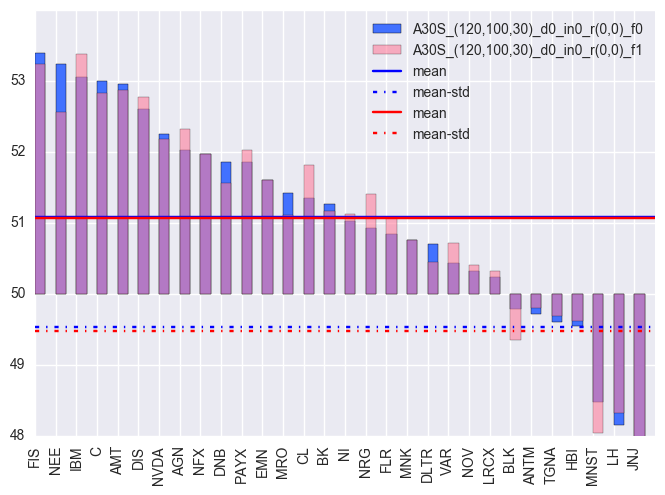

51.0812877892  |  51.0685874006
49.5309793482  |  49.480480246


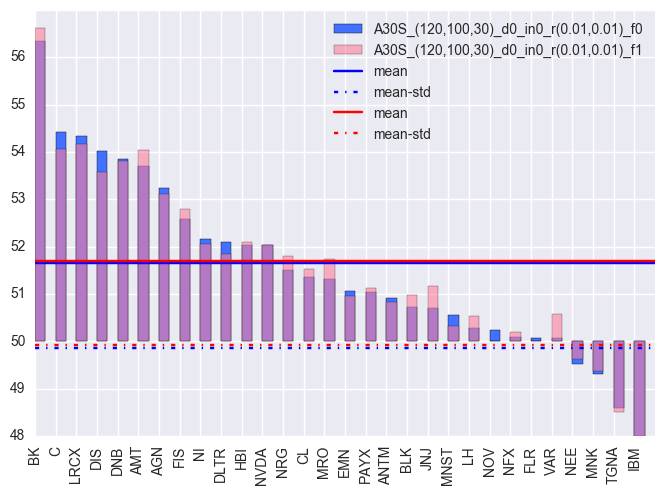

51.6564466497  |  51.6961012814
49.8515090602  |  49.911441701


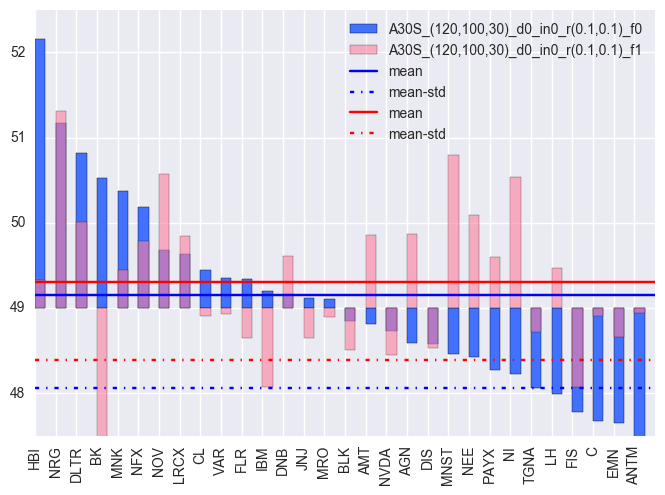

50.3200069969  |  50.6121488108
48.1340214915  |  48.7920173301


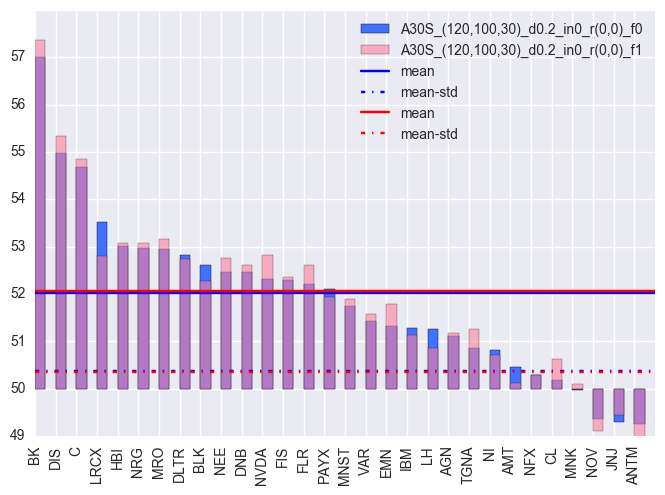

52.0103310187  |  52.0616896766
50.3786864433  |  50.3551780076


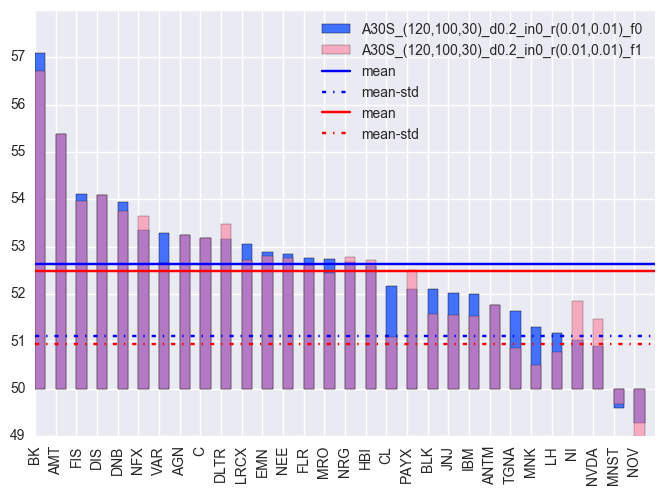

52.6241094858  |  52.4923042436
51.1112627156  |  50.9510249119


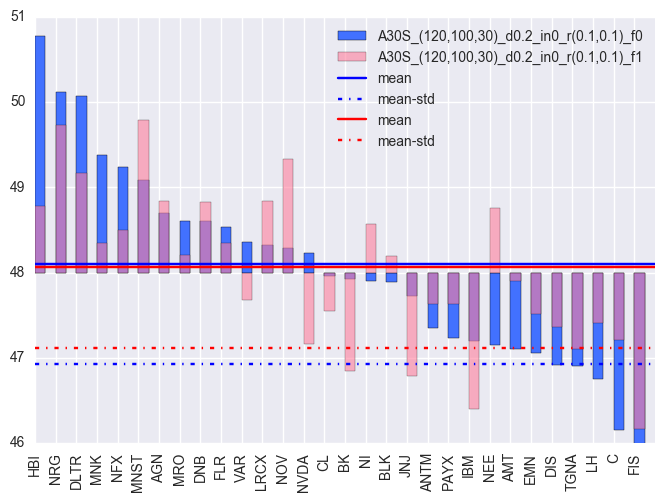

50.2072265884  |  50.1325739485
47.8627394186  |  48.2188336551


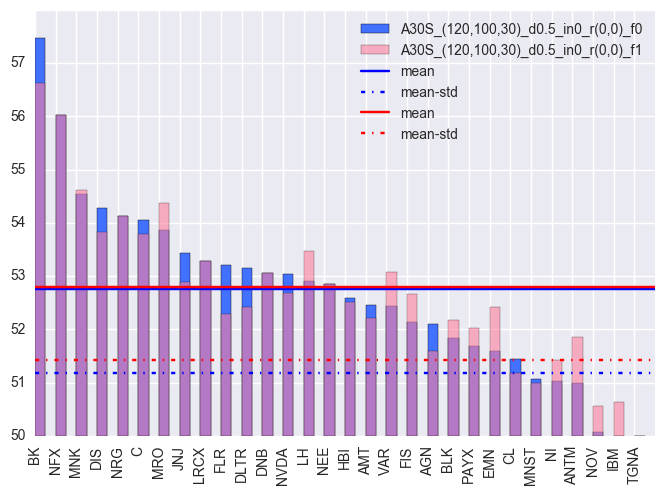

52.7589731896  |  52.7934518221
51.1816940893  |  51.4214507699


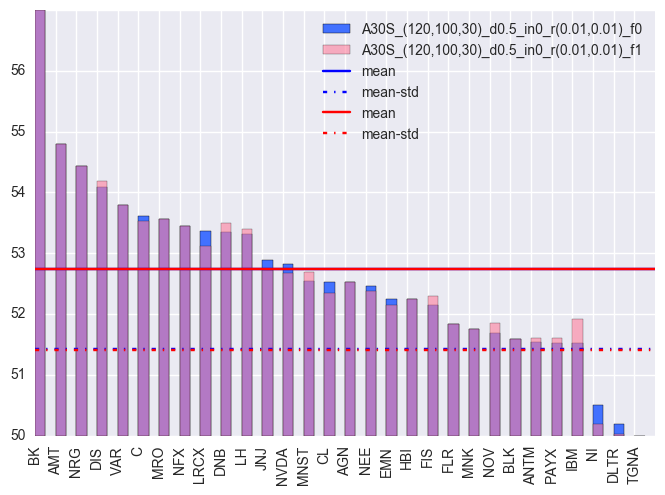

52.7436998124  |  52.7431824576
51.4268218415  |  51.4114733621


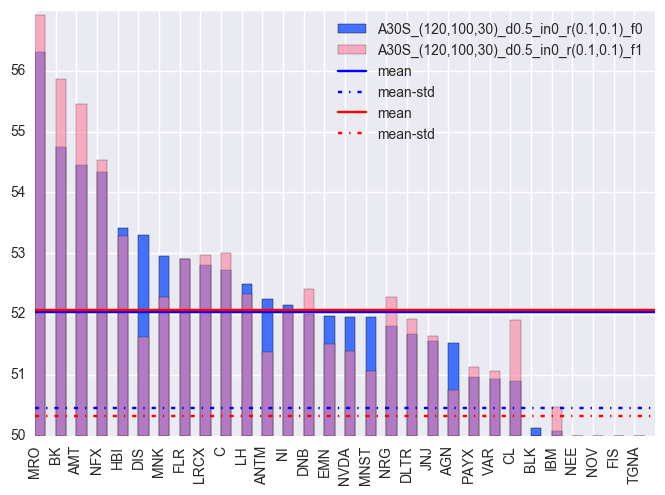

52.041089539  |  52.0637503441
50.4587245965  |  50.3291155188


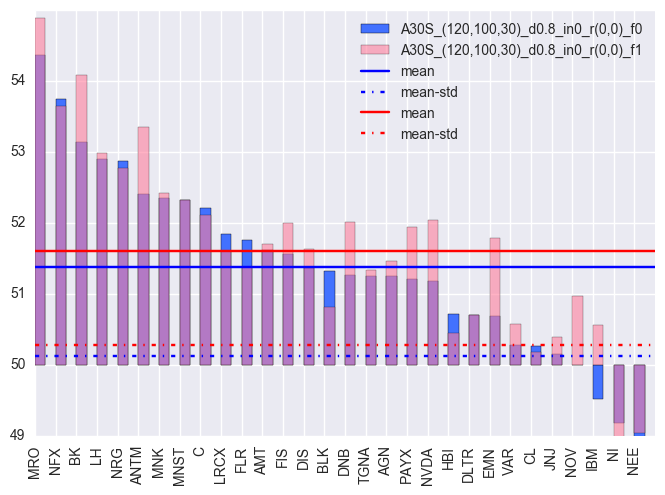

51.3836004339  |  51.6102645827
50.1224166414  |  50.28835055


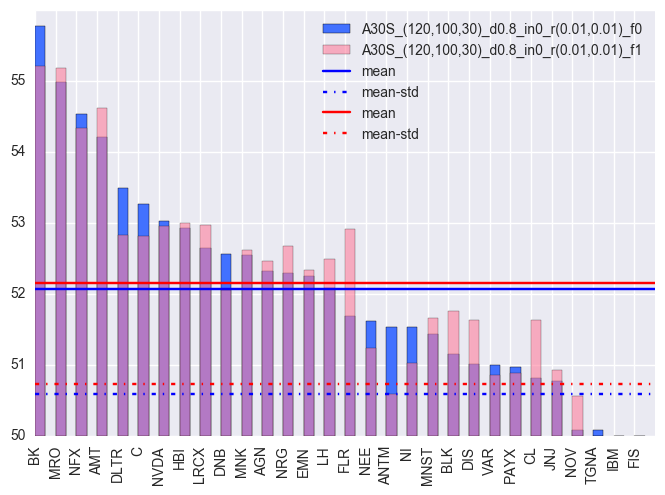

52.0765063416  |  52.1598804089
50.5864453743  |  50.7389990657


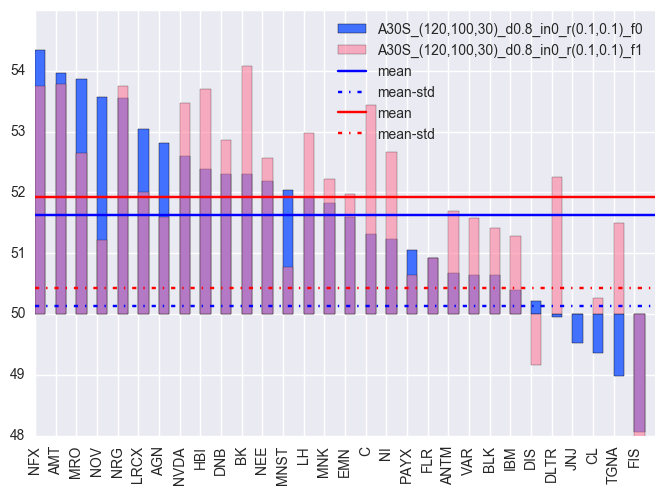

51.6340897056  |  51.924785429
50.1356241181  |  50.430869741


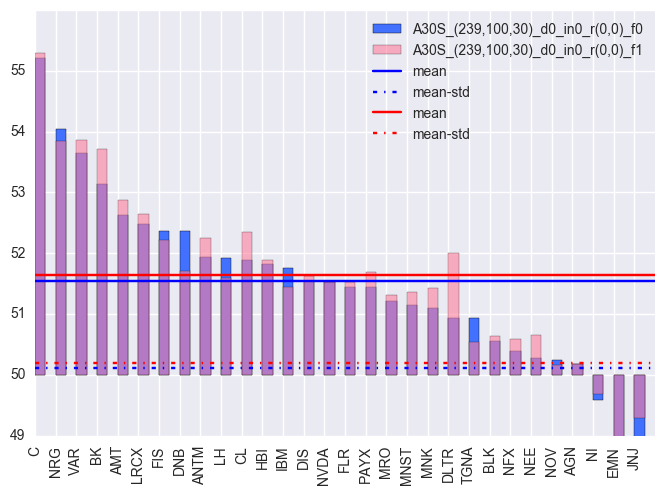

51.5461490166  |  51.6411284815
50.1173352653  |  50.2055647853


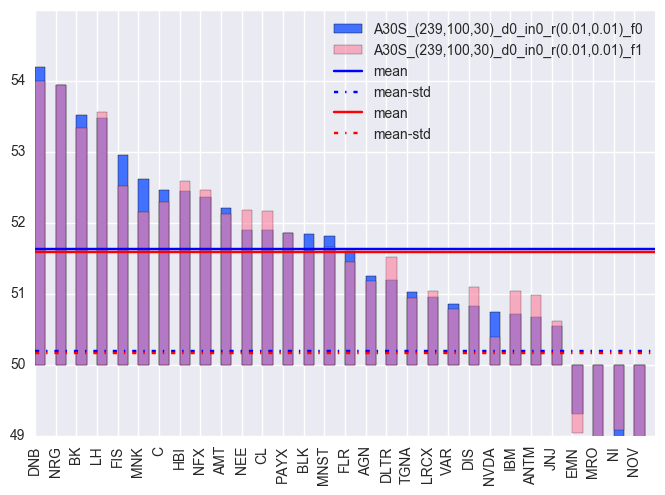

51.6272847685  |  51.5884512105
50.2005076181  |  50.1651094109


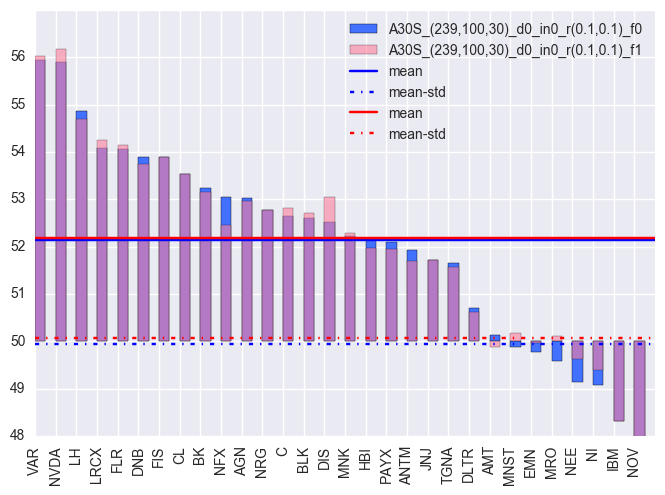

52.1301991906  |  52.1854417232
49.9477509307  |  50.0731949909


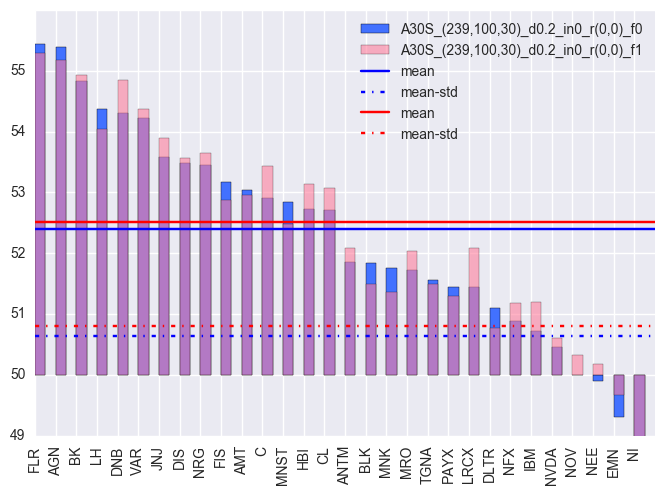

52.4067349582  |  52.5193552507
50.6442523577  |  50.8093010127


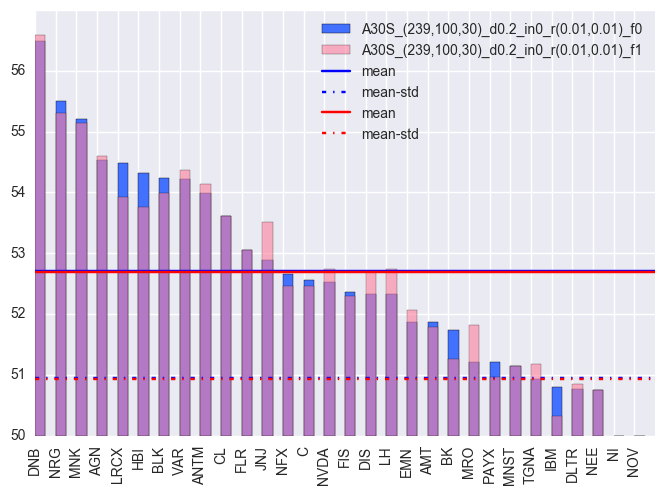

52.705110005  |  52.6876557129
50.9578505214  |  50.9393492851


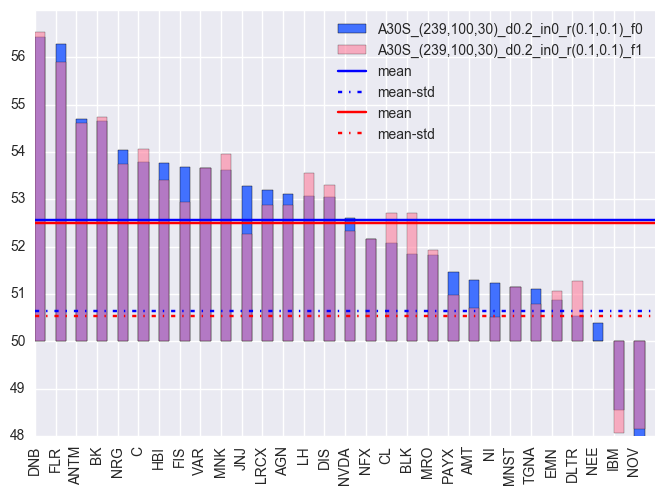

52.5587540178  |  52.4919984093
50.6327837787  |  50.5418730681


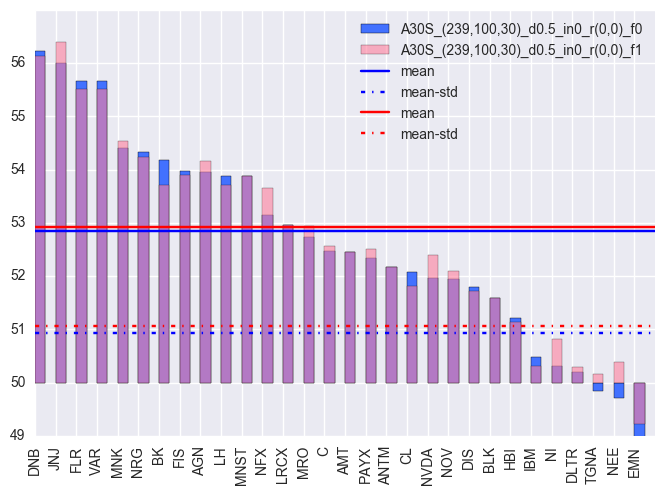

52.8554765761  |  52.9177818514
50.9289992229  |  51.062293519


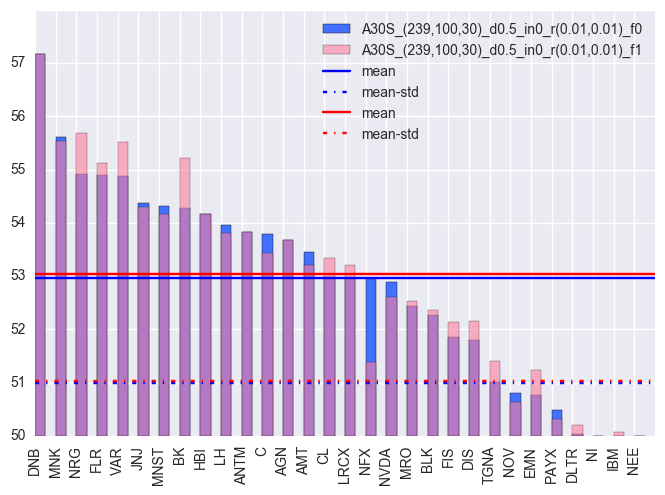

52.9607532988  |  53.0348970627
50.989375733  |  51.0287984887


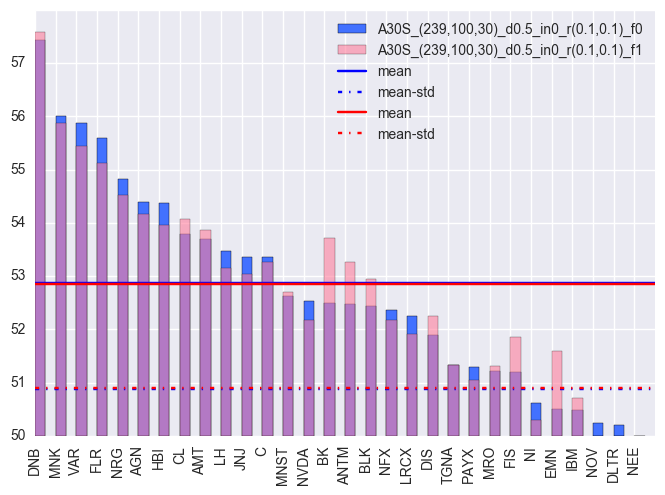

52.8637269699  |  52.8520107682
50.8774279744  |  50.8973404947


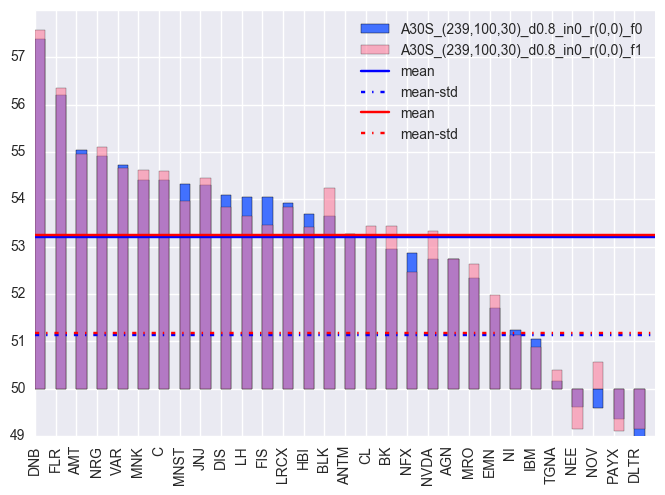

53.2029153744  |  53.2381738536
51.1270978719  |  51.1737236632


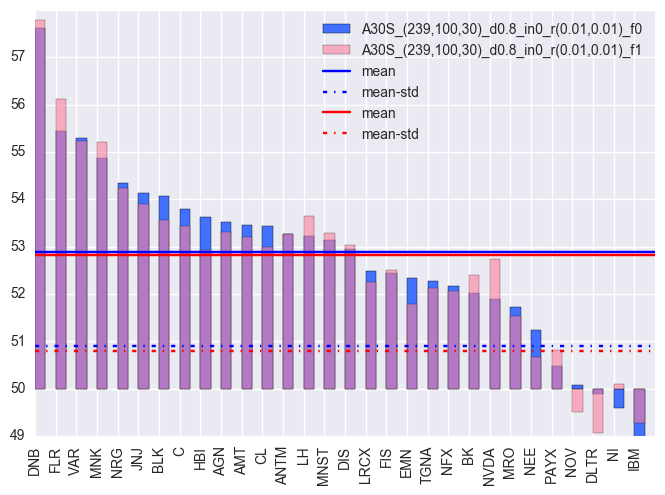

52.8791548366  |  52.8232933107
50.9087969058  |  50.7862175017


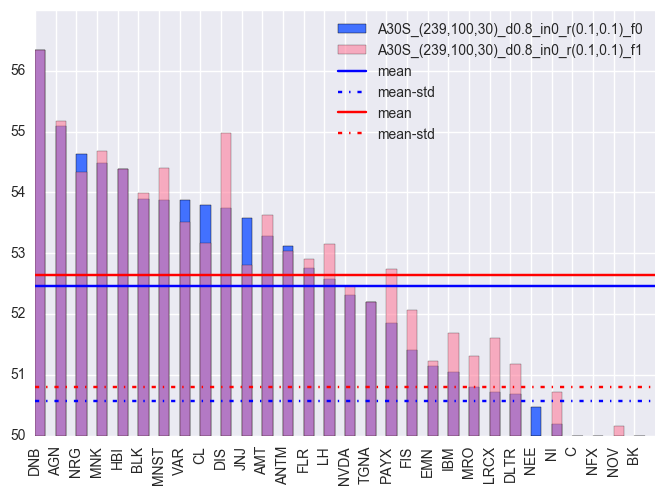

52.4613691097  |  52.6516825972
50.5803838708  |  50.7985984161


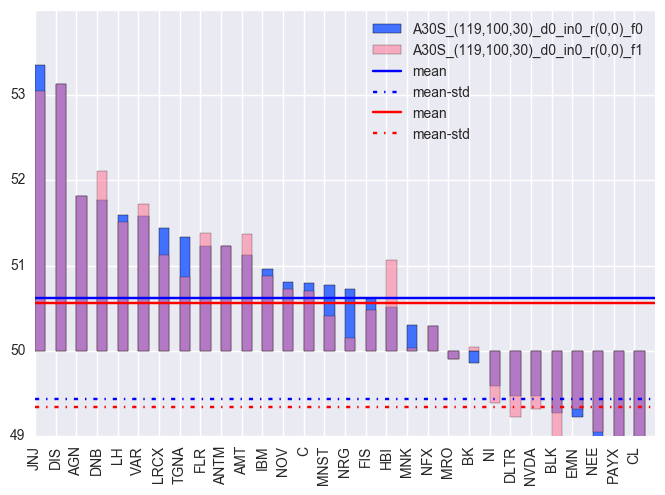

50.6204748781  |  50.5659530686
49.4297706856  |  49.3377501919


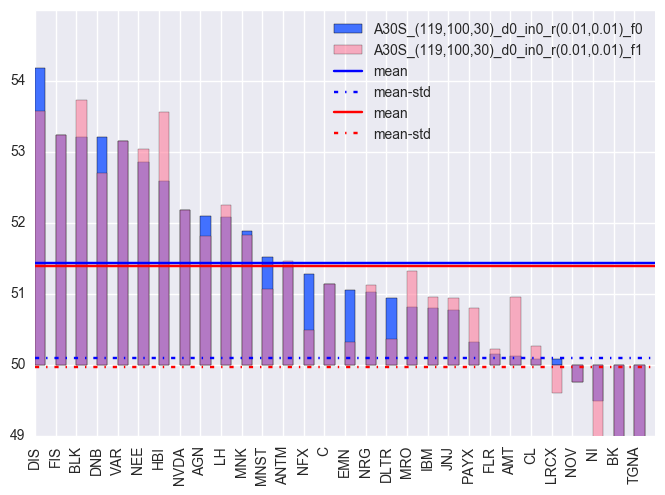

51.4324884662  |  51.3898002609
50.0968123052  |  49.9755271122


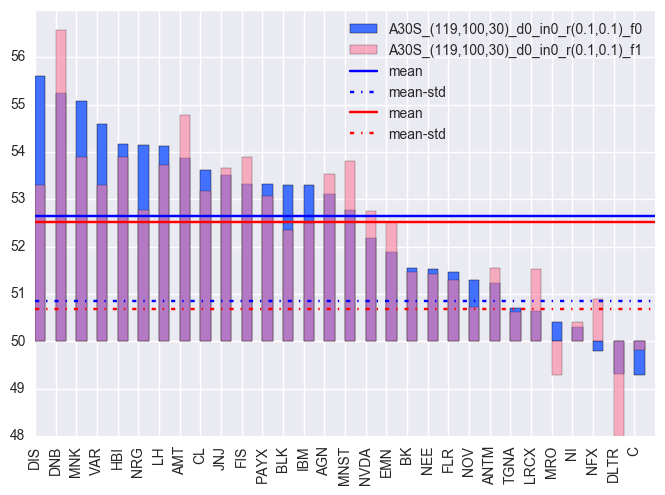

52.6455173516  |  52.5143820012
50.8588374796  |  50.6801131609


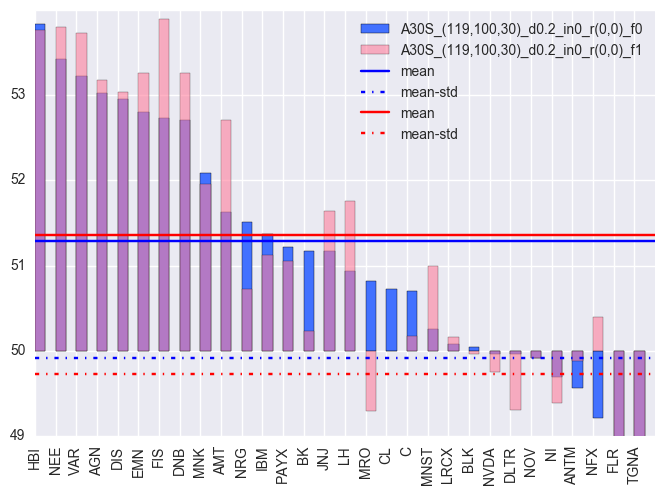

51.2824097581  |  51.3540868757
49.9161657525  |  49.7280274137


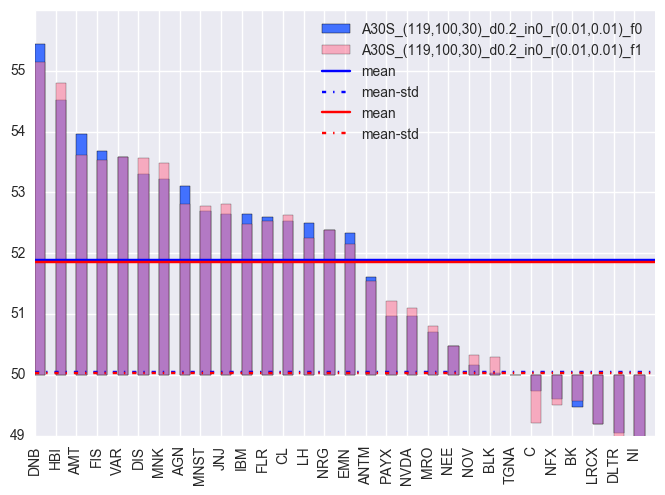

51.8831710707  |  51.8616163013
50.0519516615  |  50.0371476796


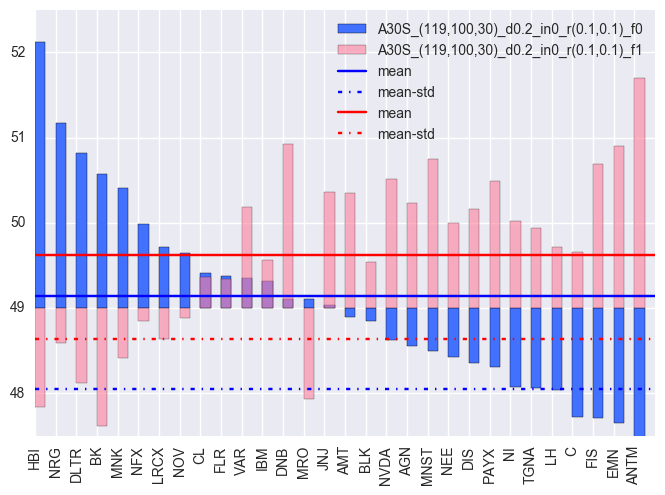

50.2875179536  |  51.2495714319
48.0945993109  |  49.265926896


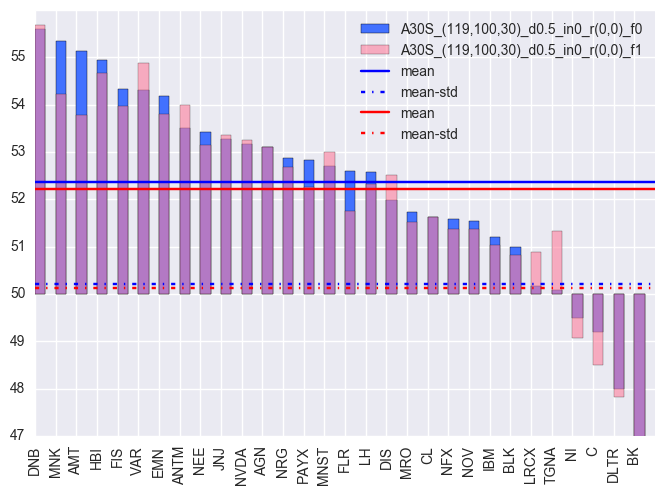

52.3541516154  |  52.2078972762
50.1995372616  |  50.1228534008


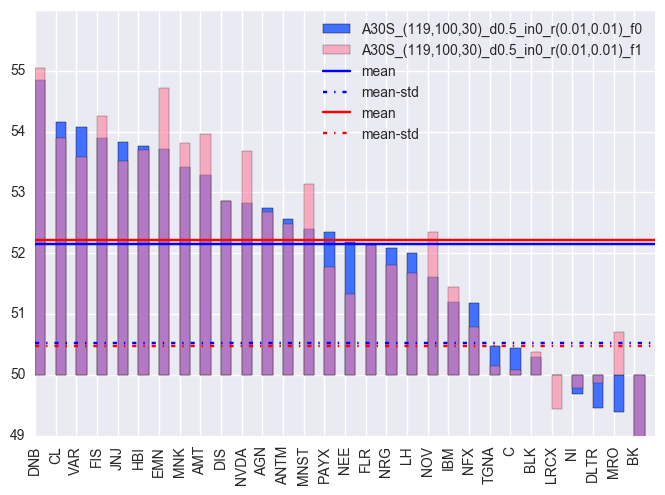

52.1587468649  |  52.2218485058
50.5215148983  |  50.4797197385


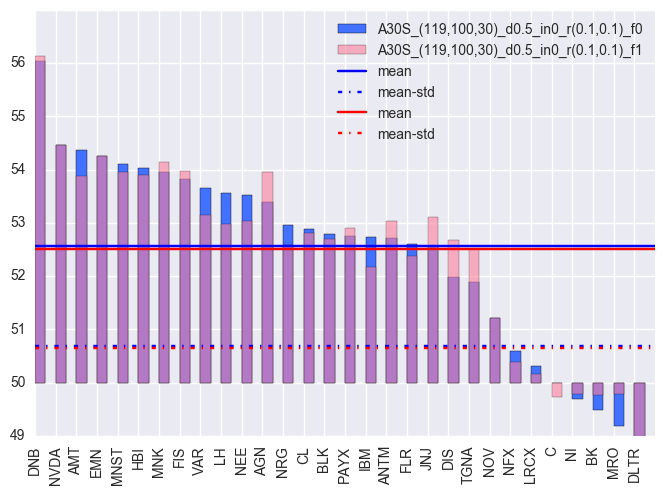

52.5607666444  |  52.5144113463
50.688622088  |  50.6530199889


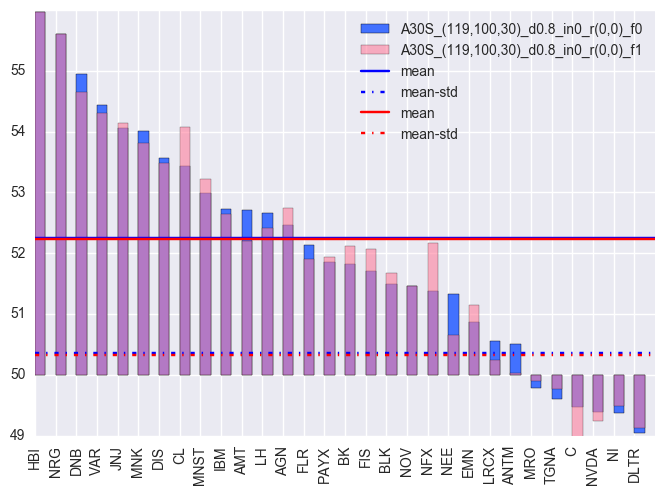

52.2438808468  |  52.2352856879
50.3630072375  |  50.3277764119


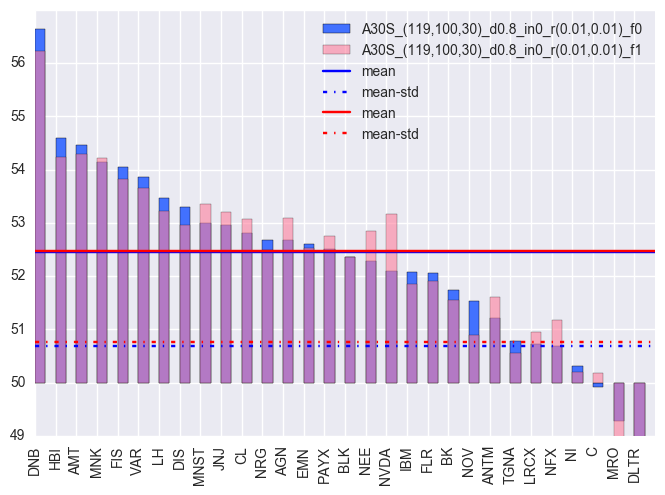

52.4627981552  |  52.4745003856
50.6821979774  |  50.7692330414


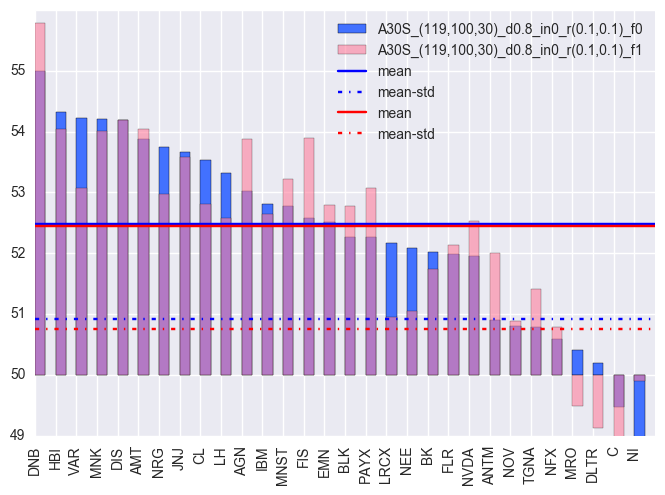

52.4877928427  |  52.4532389305
50.9152450734  |  50.7564211179


In [5]:
for i in range(0,len(a.experimentList30),2):
    comparisonGraph(a.experimentList30[i],a.experimentList30[i+1])
    print("===============================")
    print("%s  |  %s"%(a.experimentList30[i].getTestAccuracy(),a.experimentList30[i+1].getTestAccuracy()))
    print("%s  |  %s"%(a.experimentList30[i].getTestAccuracyMinusSigma(),a.experimentList30[i+1].getTestAccuracyMinusSigma()))

### Add denoising

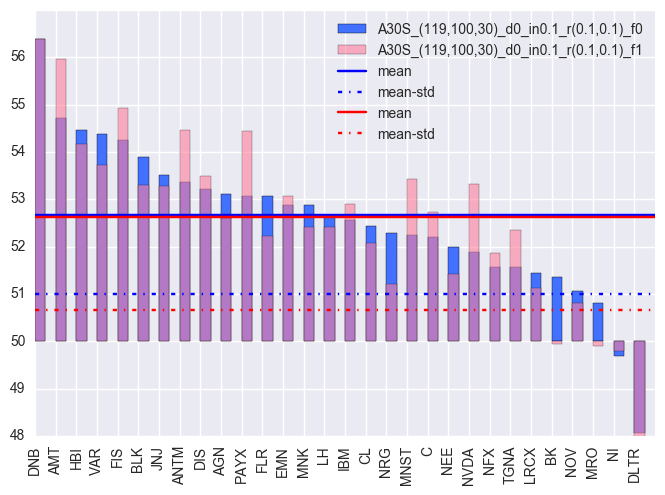

52.6589000849  |  52.6170732649
51.001665425  |  50.6591979624


In [6]:
comparisonGraph(a.experimentList30_a_denoising[0],a.experimentList30_a_denoising[1])
print("===============================")
print("%s  |  %s"%(a.experimentList30_a_denoising[0].getTestAccuracy(),a.experimentList30_a_denoising[1].getTestAccuracy()))
print("%s  |  %s"%(a.experimentList30_a_denoising[0].getTestAccuracyMinusSigma(),a.experimentList30_a_denoising[1].getTestAccuracyMinusSigma()))

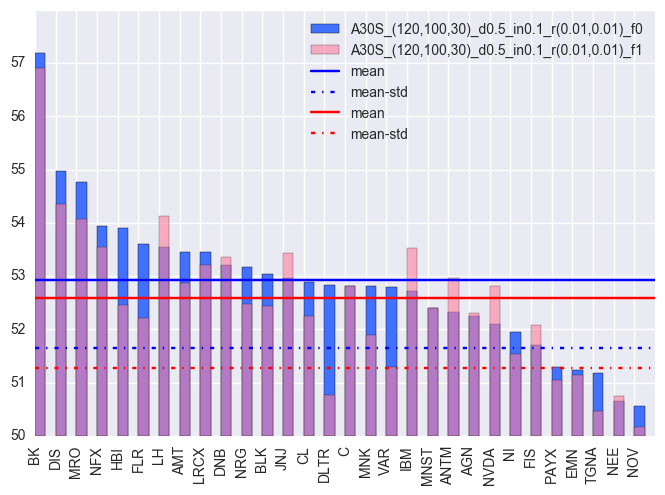

52.92438983  |  52.5841560863
51.6607345865  |  51.2835060561


In [7]:
comparisonGraph(a.experimentList30_z_denoising[0],a.experimentList30_z_denoising[1])
print("===============================")
print("%s  |  %s"%(a.experimentList30_z_denoising[0].getTestAccuracy(),a.experimentList30_z_denoising[1].getTestAccuracy()))
print("%s  |  %s"%(a.experimentList30_z_denoising[0].getTestAccuracyMinusSigma(),a.experimentList30_z_denoising[1].getTestAccuracyMinusSigma()))

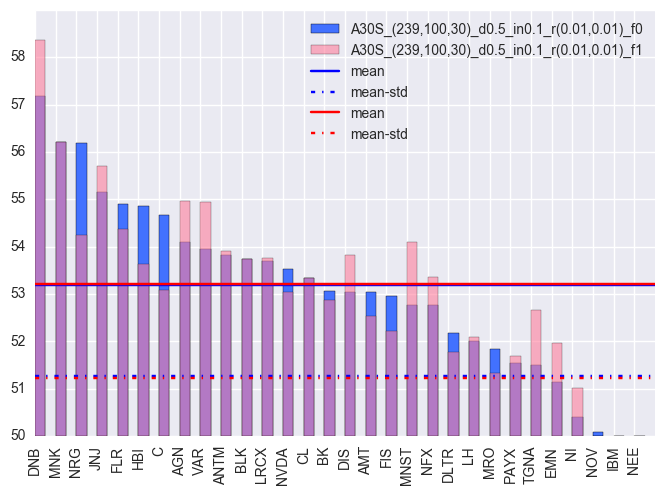

53.1865812263  |  53.2074592144
51.2617187369  |  51.2149025822


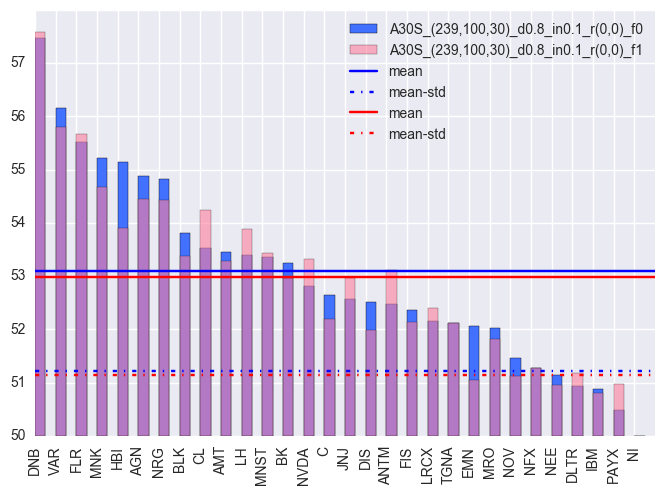

53.0985431579  |  52.9886061155
51.2241475971  |  51.1454607915


In [8]:
comparisonGraph(a.experimentList30_a_z_denoising[0],a.experimentList30_a_z_denoising[1])
print("===============================")
print("%s  |  %s"%(a.experimentList30_a_z_denoising[0].getTestAccuracy(),a.experimentList30_a_z_denoising[1].getTestAccuracy()))
print("%s  |  %s"%(a.experimentList30_a_z_denoising[0].getTestAccuracyMinusSigma(),a.experimentList30_a_z_denoising[1].getTestAccuracyMinusSigma()))
comparisonGraph(a.experimentList30_a_z_denoising[2],a.experimentList30_a_z_denoising[3])
print("===============================")
print("%s  |  %s"%(a.experimentList30_a_z_denoising[2].getTestAccuracy(),a.experimentList30_a_z_denoising[3].getTestAccuracy()))
print("%s  |  %s"%(a.experimentList30_a_z_denoising[2].getTestAccuracyMinusSigma(),a.experimentList30_a_z_denoising[3].getTestAccuracyMinusSigma()))

## Autoencoder 50

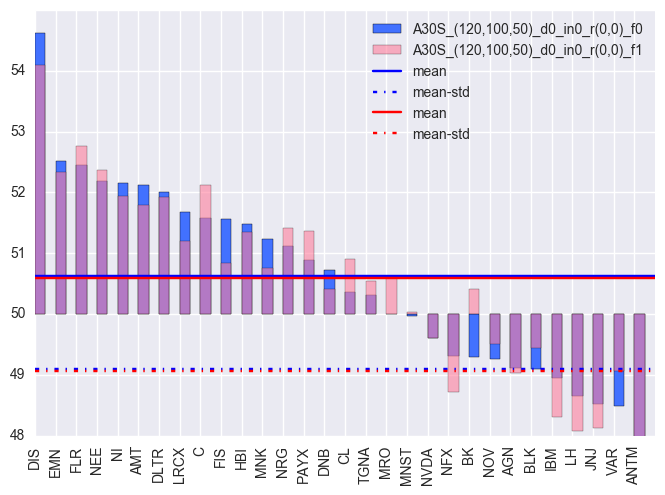

50.6338751413  |  50.5996902433
49.1041211219  |  49.066159773


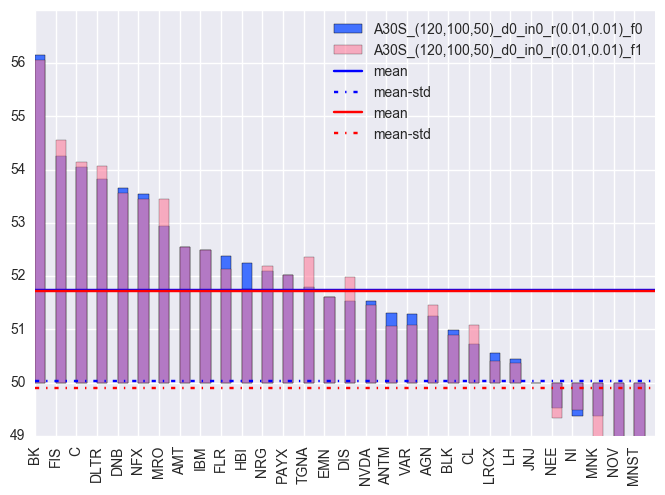

51.7435121496  |  51.7205827234
50.0260293359  |  49.9061256772


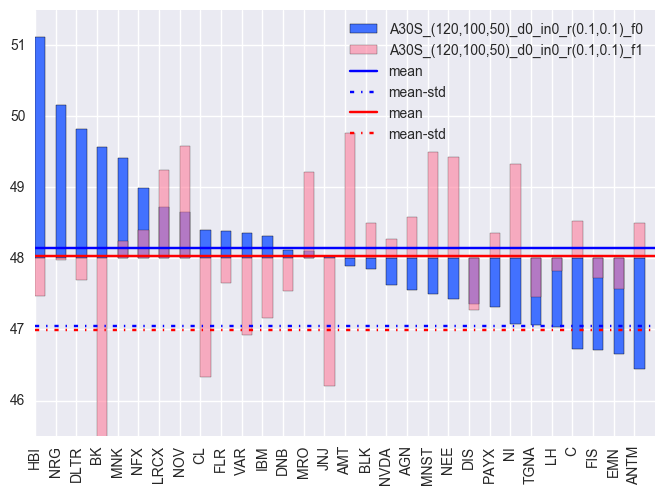

50.2875179536  |  50.0783615578
48.0945993109  |  47.9897897603


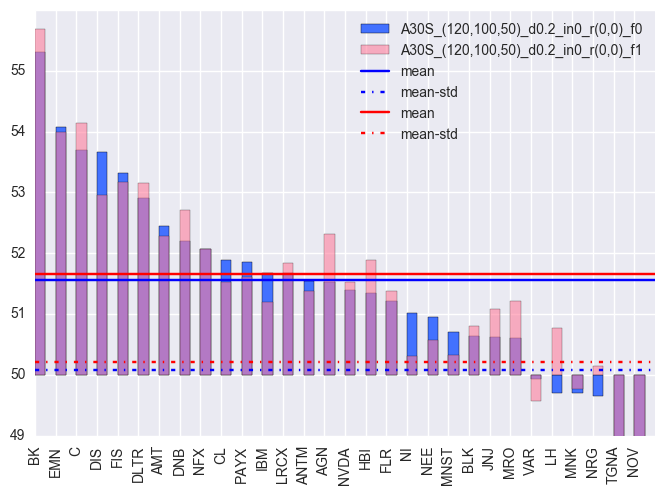

51.5642643406  |  51.6658839343
50.0769065947  |  50.2112934718


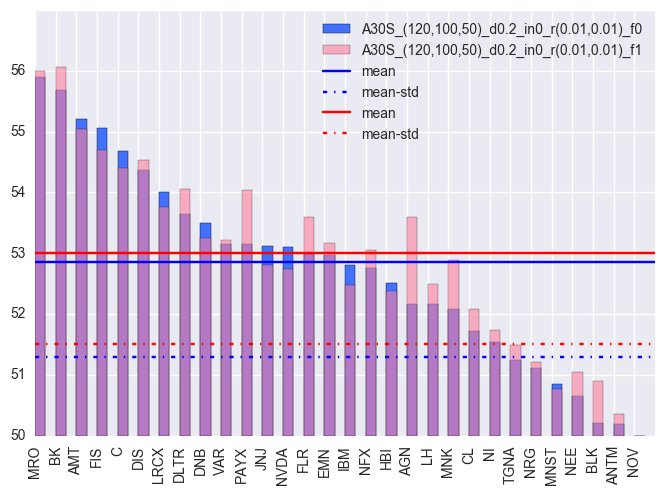

52.8537264082  |  53.0066884656
51.3006972817  |  51.5044564837


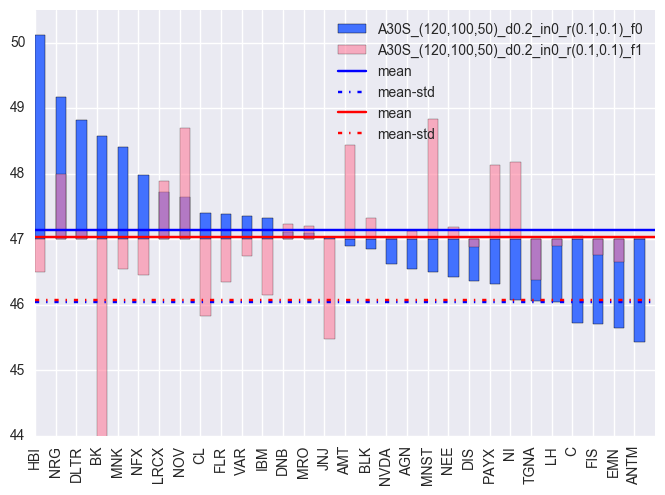

50.2875179536  |  50.0803063106
48.0945993109  |  48.1394512127


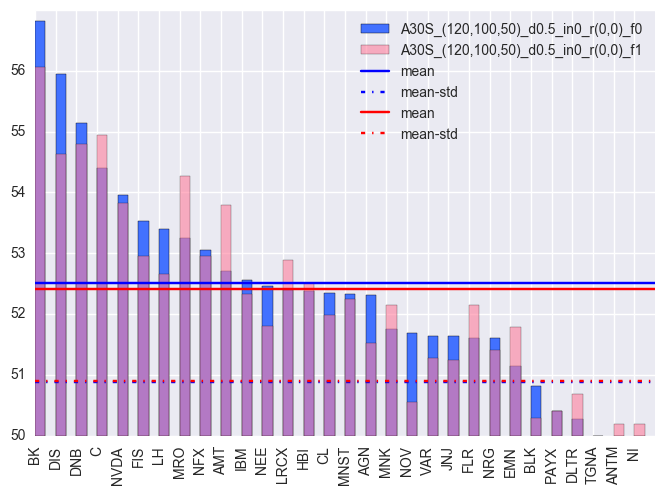

52.519831582  |  52.4173041412
50.8846301895  |  50.9067878002


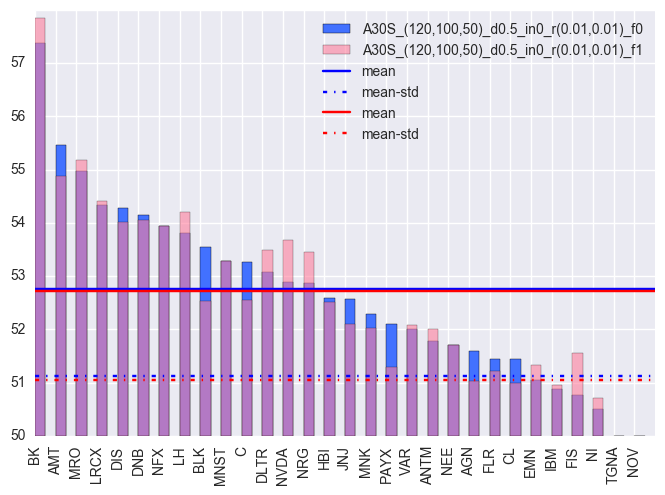

52.7542657005  |  52.7227759113
51.120586032  |  51.0551259952


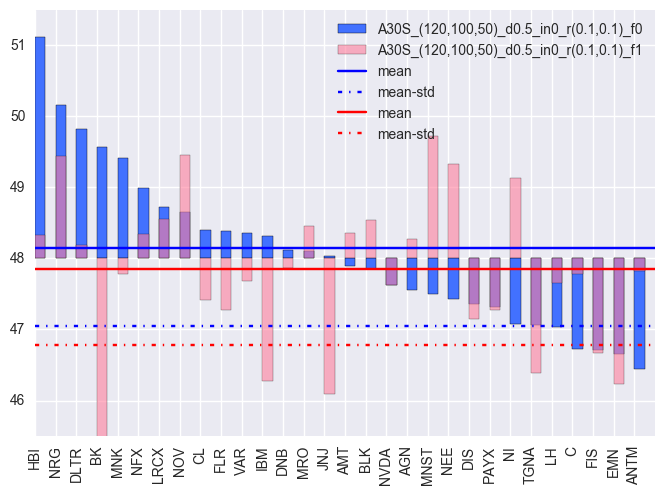

50.2875179536  |  49.7070921163
48.0945993109  |  47.5697928365


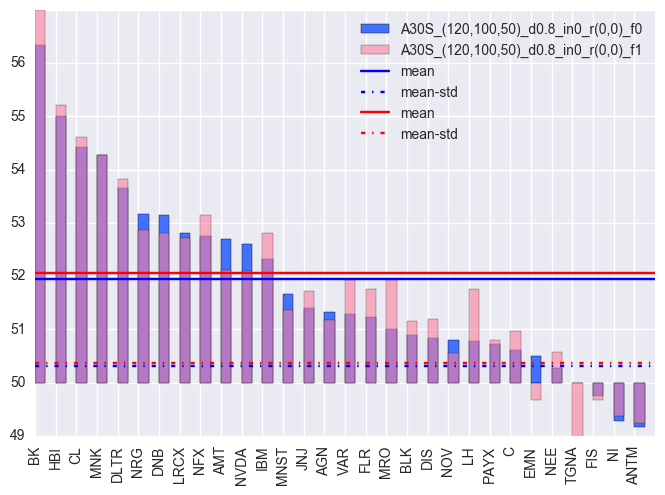

51.9403296263  |  52.05787637
50.3107923561  |  50.3780506656


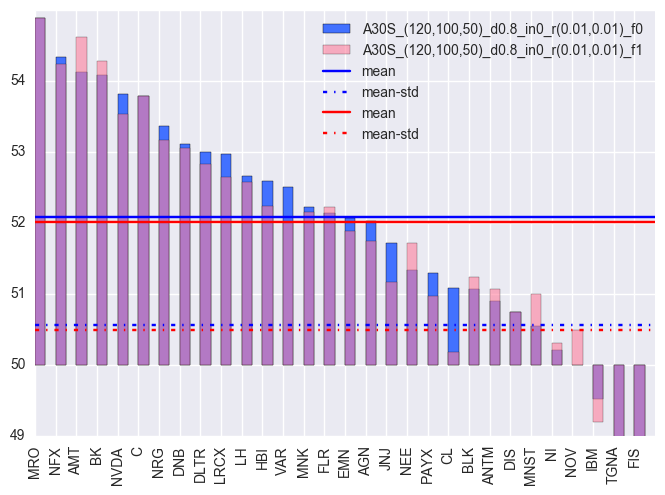

52.0867029158  |  52.0108125268
50.5581933183  |  50.4863951323


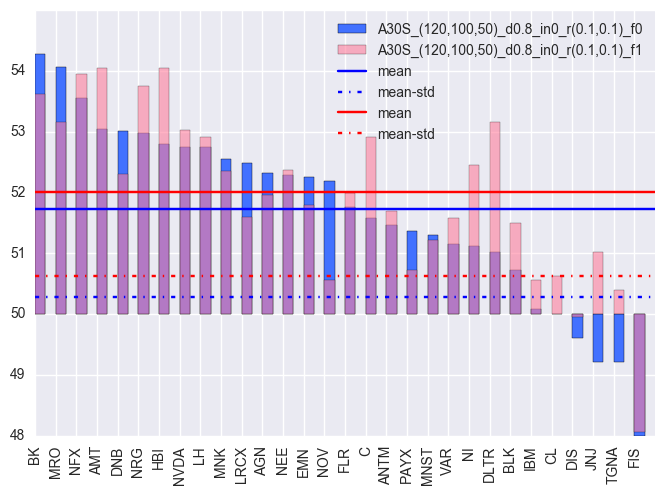

51.7363360248  |  52.0060646464
50.2868600802  |  50.6229629533


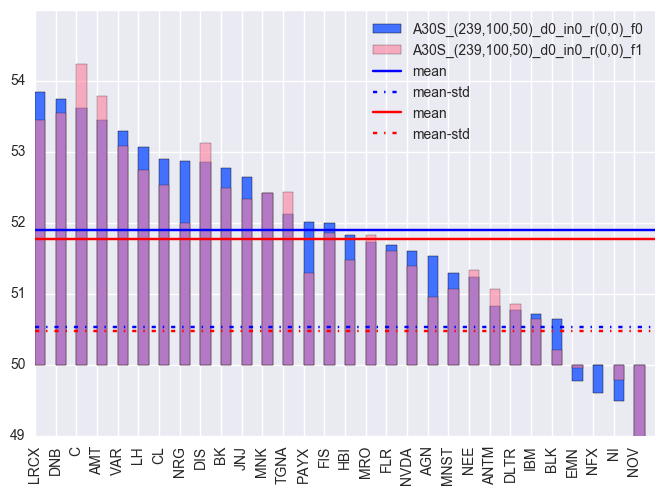

51.8948776035  |  51.7780010245
50.5385484414  |  50.4789347482


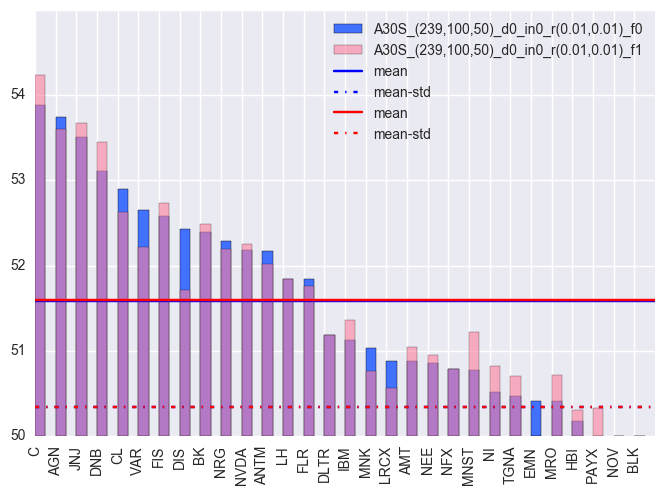

51.5781724902  |  51.5911571524
50.3435843415  |  50.3372554081


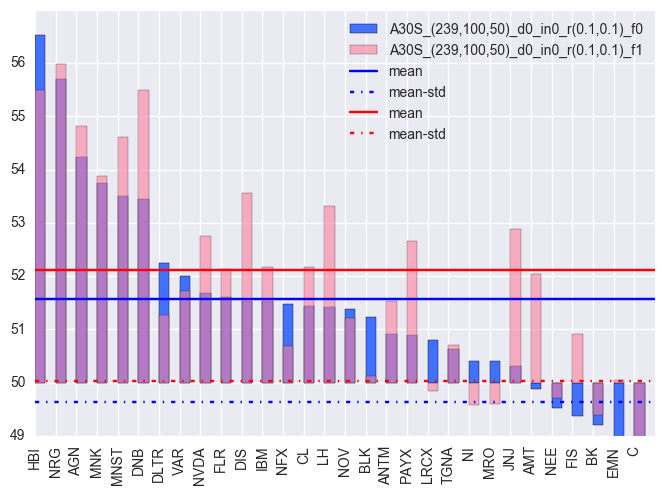

51.5672849119  |  52.1090060385
49.6311856325  |  50.0400503178


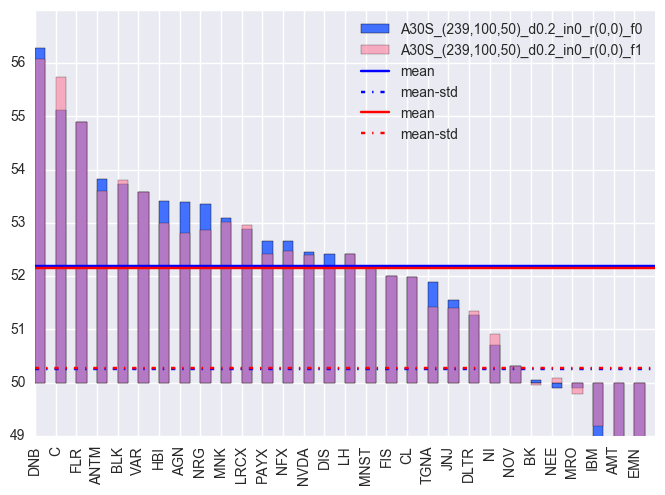

52.1965394596  |  52.1547157244
50.2667973757  |  50.2768508811


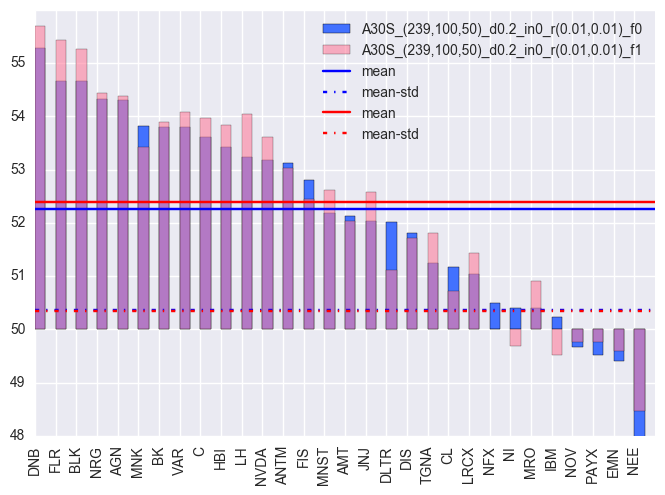

52.2620748838  |  52.3940336719
50.3705506974  |  50.3549879344


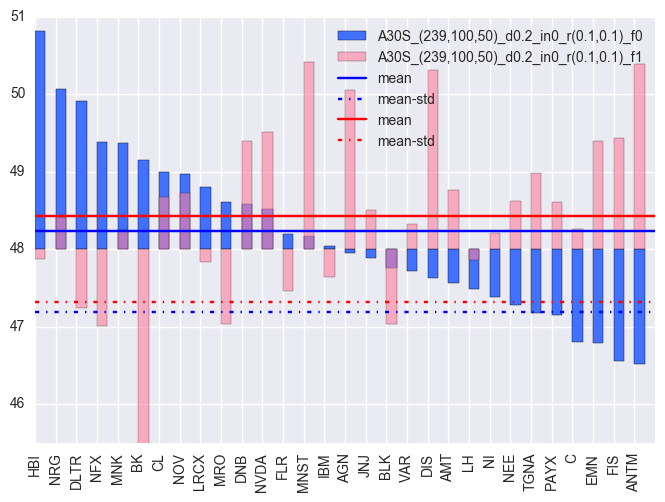

50.4835411053  |  50.8474093781
48.3855200843  |  48.6452813704


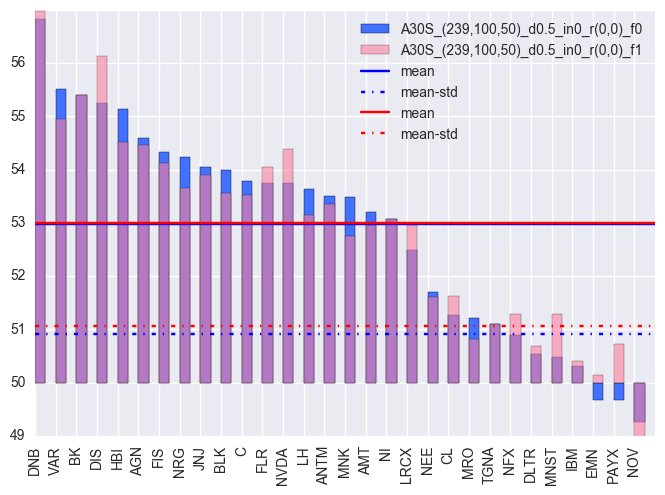

52.9745624975  |  52.9963961166
50.9174467215  |  51.0635760455


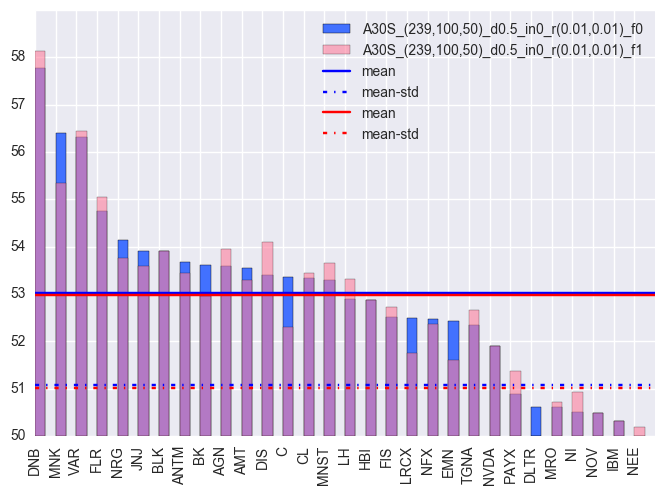

53.0126177899  |  52.9715903188
51.0807269292  |  51.0126913857


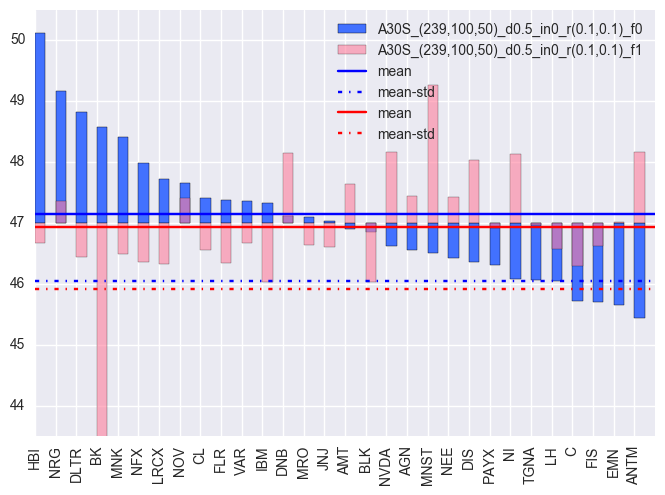

50.2875179536  |  49.8789424829
48.0945993109  |  47.8276902456


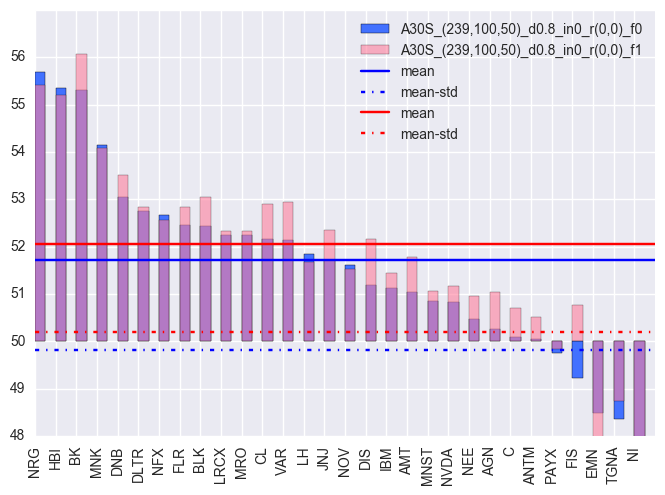

51.7101209522  |  52.0475128702
49.8195207702  |  50.189732152


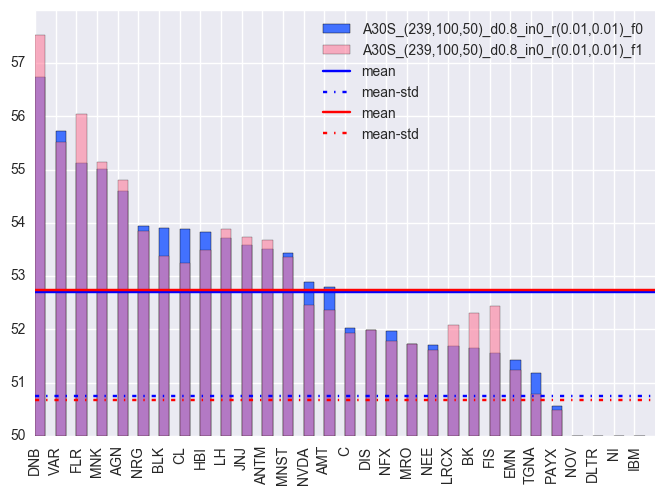

52.7039043513  |  52.7359651713
50.7596245295  |  50.6710847413


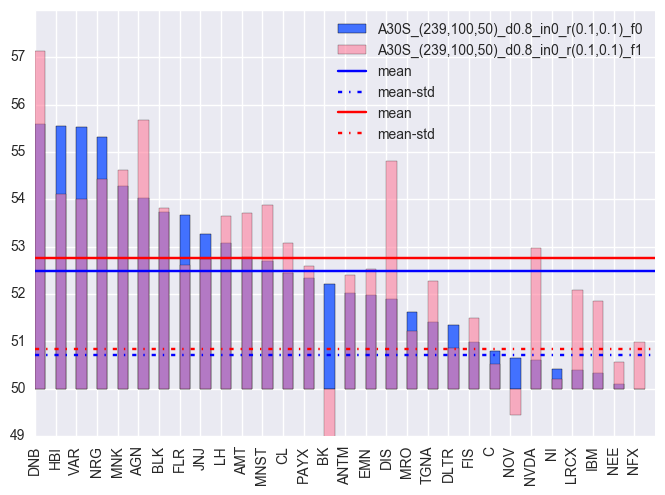

52.4868000784  |  52.7549096616
50.7190187253  |  50.8453450018


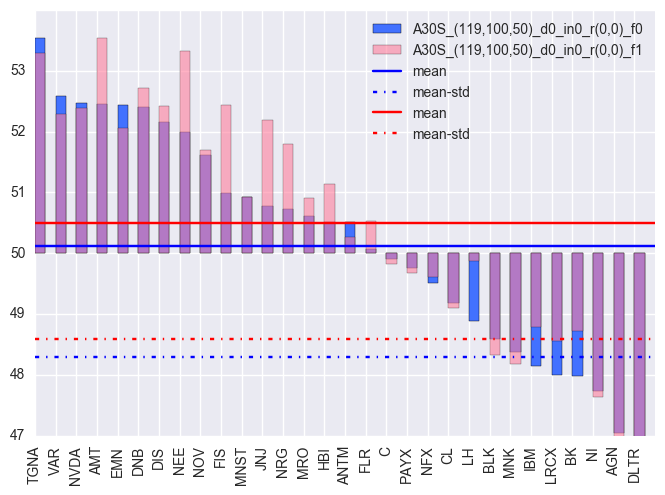

50.1221901733  |  50.4999775871
48.299115071  |  48.5947413401


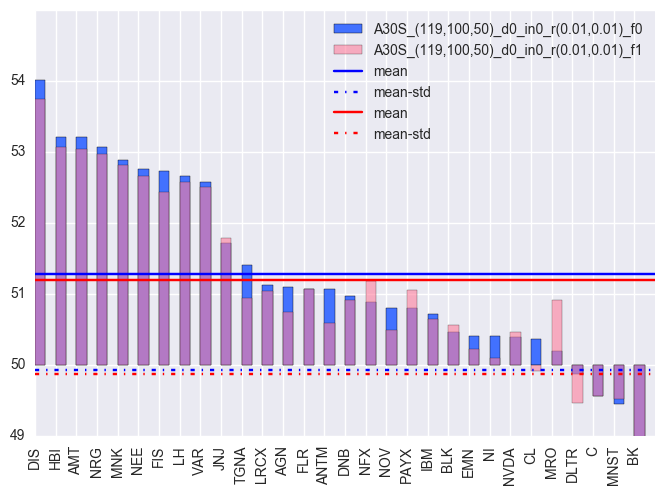

51.2807832342  |  51.2031830229
49.9227373671  |  49.8735123755


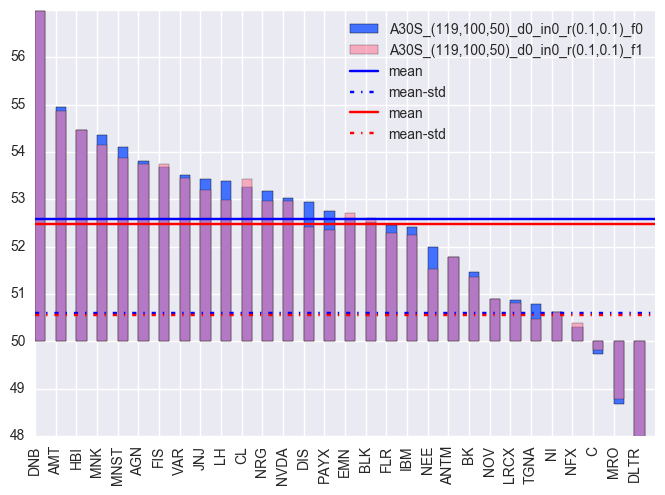

52.5757304783  |  52.4866103271
50.5899064845  |  50.5529245268


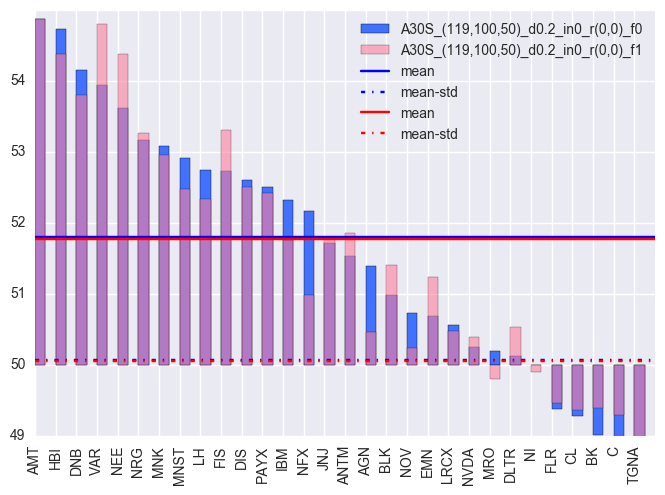

51.8040049496  |  51.7794536258
50.0711933441  |  50.0496852526


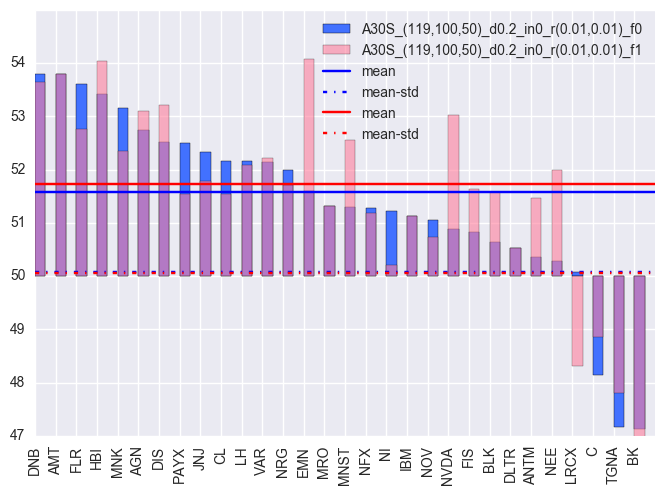

51.5843560262  |  51.731838277
50.0766522394  |  50.0652424952


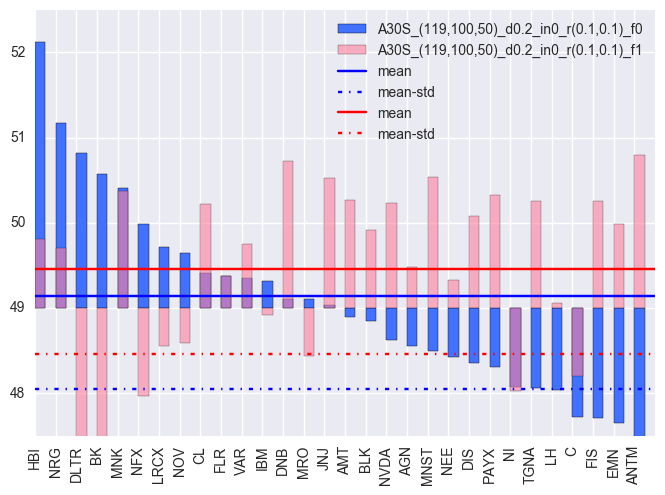

50.2875179536  |  50.911104671
48.0945993109  |  48.9311435335


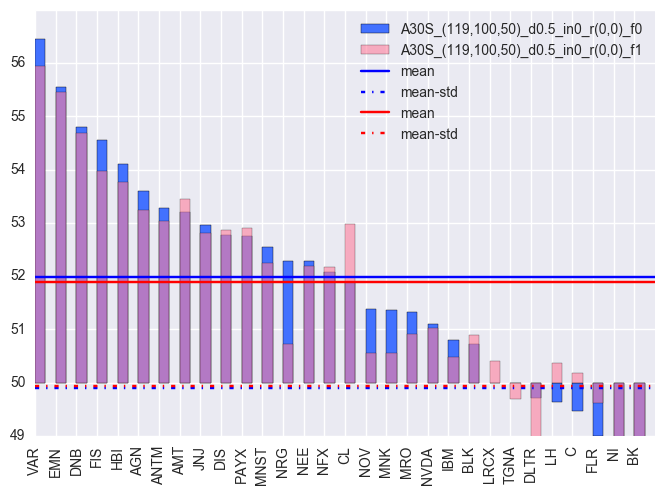

51.985029147  |  51.8956061739
49.9104721389  |  49.943701401


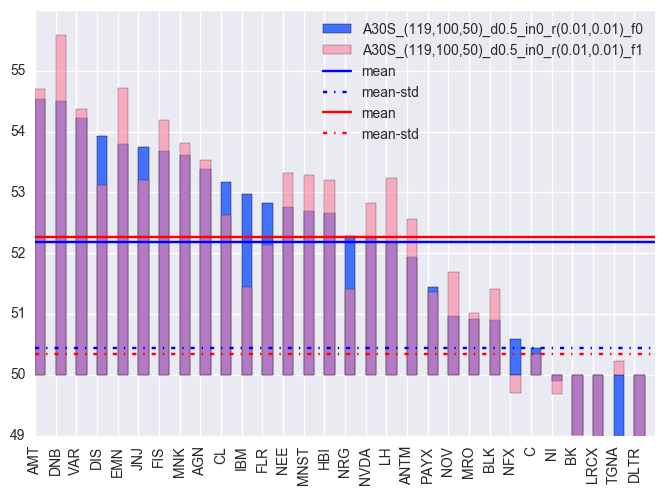

52.1923375482  |  52.2745118871
50.446586227  |  50.3462387296


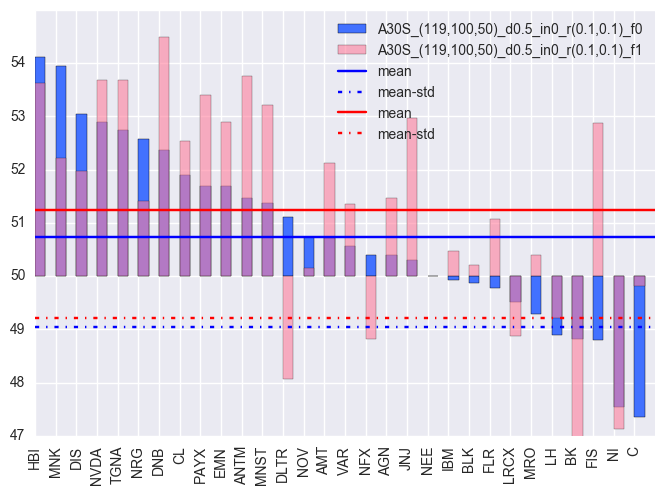

50.7316888339  |  51.2360246958
49.0515302727  |  49.2176376128


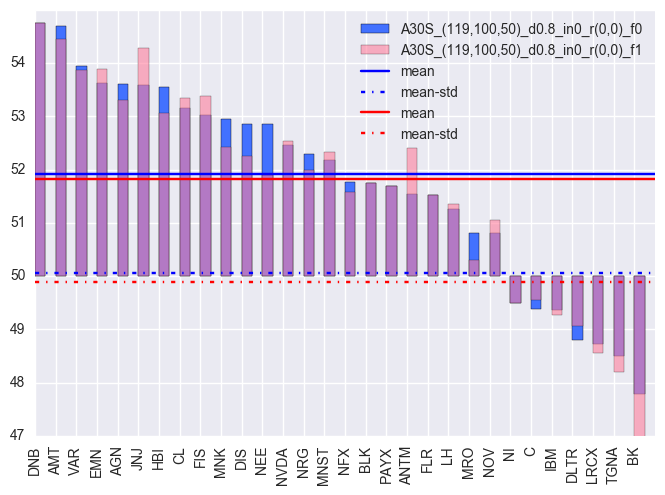

51.9156123318  |  51.8309582561
50.0585140681  |  49.8898325177


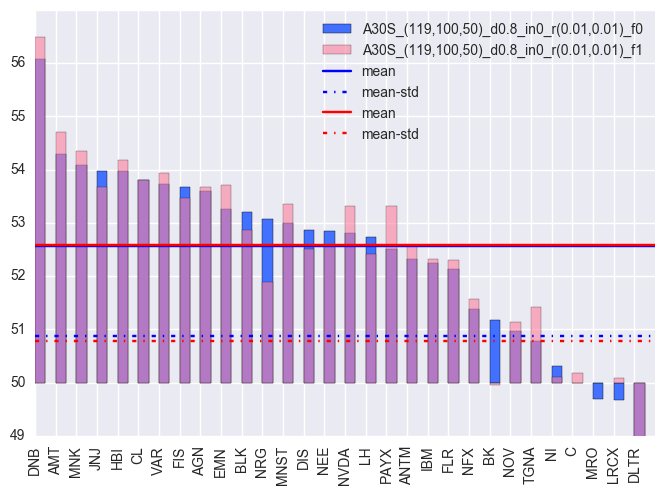

52.5572860968  |  52.57887246
50.8765455354  |  50.7839827058


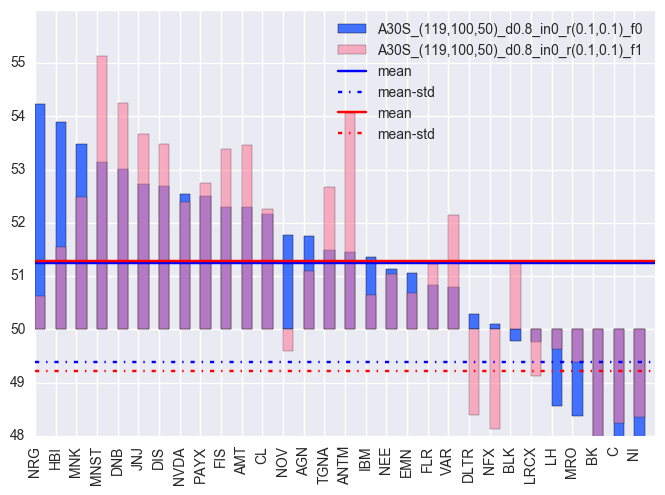

51.2522950816  |  51.2771457832
49.3927376286  |  49.2274815697


In [9]:
for i in range(0,len(a.experimentList50),2):
    comparisonGraph(a.experimentList50[i],a.experimentList50[i+1])
    print("===============================")
    print("%s  |  %s"%(a.experimentList50[i].getTestAccuracy(),a.experimentList50[i+1].getTestAccuracy()))
    print("%s  |  %s"%(a.experimentList50[i].getTestAccuracyMinusSigma(),a.experimentList50[i+1].getTestAccuracyMinusSigma()))

### Add denoising

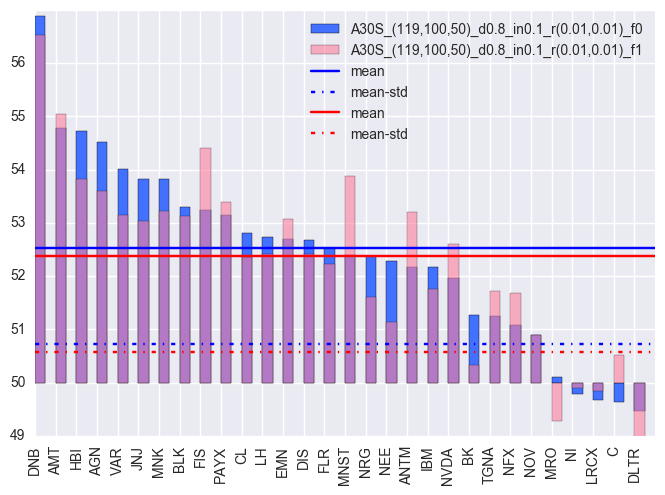

52.5335144915  |  52.3825991484
50.7319205803  |  50.5685138977


In [10]:
comparisonGraph(a.experimentList50_a_denoising[0],a.experimentList50_a_denoising[1])
print("===============================")
print("%s  |  %s"%(a.experimentList50_a_denoising[0].getTestAccuracy(),a.experimentList50_a_denoising[1].getTestAccuracy()))
print("%s  |  %s"%(a.experimentList50_a_denoising[0].getTestAccuracyMinusSigma(),a.experimentList50_a_denoising[1].getTestAccuracyMinusSigma()))

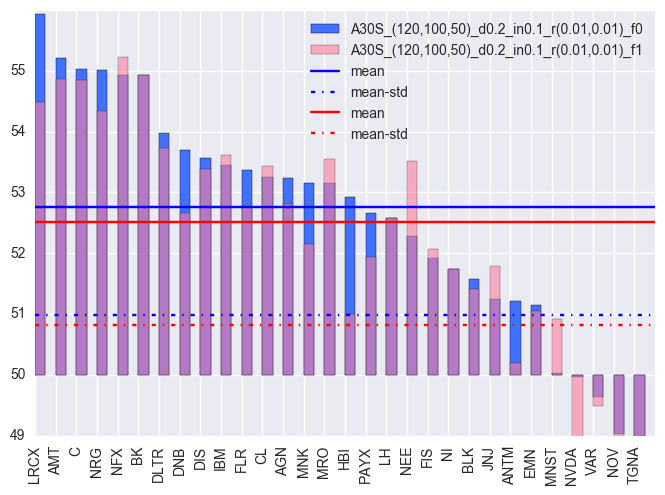

52.7622613673  |  52.5185539936
50.9908706797  |  50.8177189726


In [21]:
comparisonGraph(a.experimentList50_z_denoising[0],a.experimentList50_z_denoising[1])
print("===============================")
print("%s  |  %s"%(a.experimentList50_z_denoising[0].getTestAccuracy(),a.experimentList50_z_denoising[1].getTestAccuracy()))
print("%s  |  %s"%(a.experimentList50_z_denoising[0].getTestAccuracyMinusSigma(),a.experimentList50_z_denoising[1].getTestAccuracyMinusSigma()))

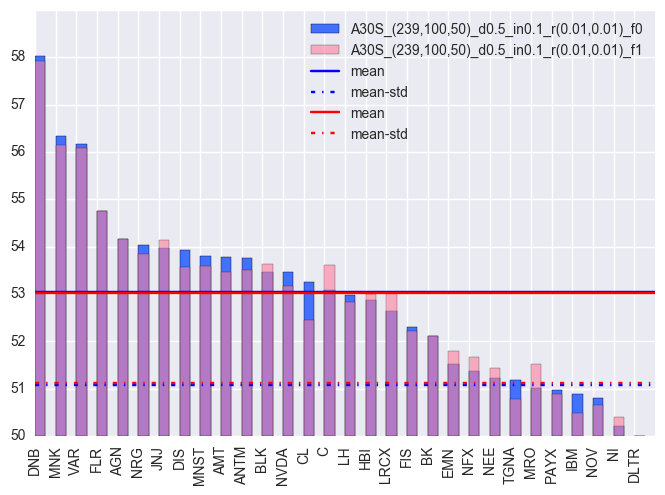

53.0385623134  |  53.0167907755
51.0869207803  |  51.1225946434


In [34]:
comparisonGraph(a.experimentList50_a_z_denoising[0],a.experimentList50_a_z_denoising[1])
print("===============================")
print("%s  |  %s"%(a.experimentList50_a_z_denoising[0].getTestAccuracy(),a.experimentList50_a_z_denoising[1].getTestAccuracy()))
print("%s  |  %s"%(a.experimentList50_a_z_denoising[0].getTestAccuracyMinusSigma(),a.experimentList50_a_z_denoising[1].getTestAccuracyMinusSigma()))

## Autoencoder 70

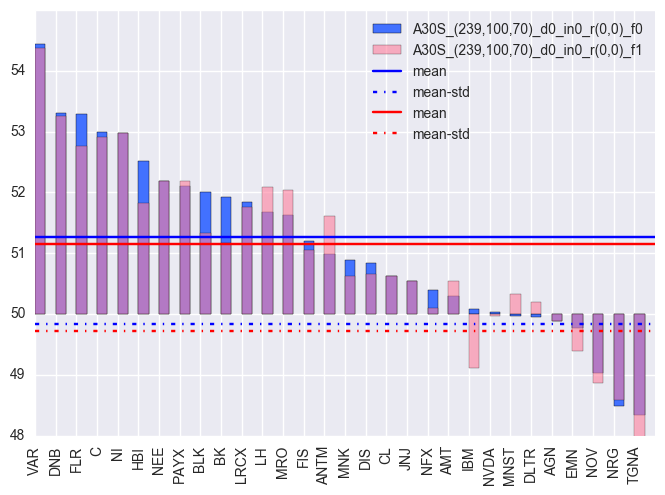

51.2695897282  |  51.1540350831
49.8444353946  |  49.7288570857


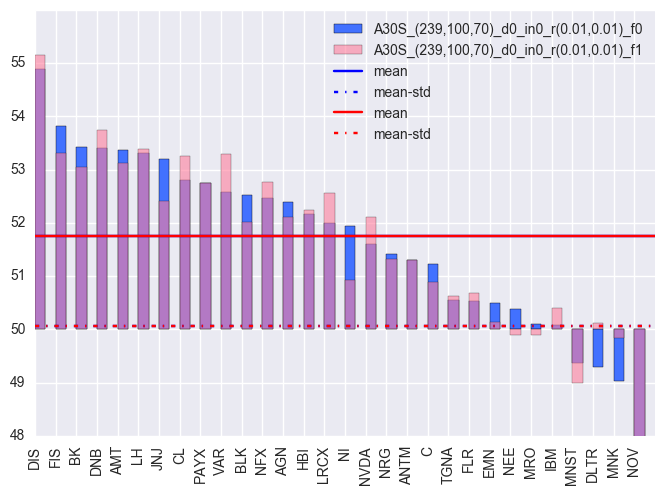

51.7539447262  |  51.7542591862
50.0632650984  |  50.067851437


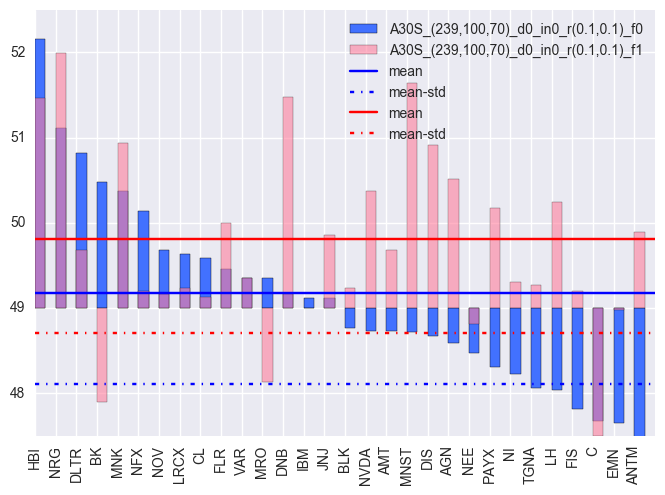

50.3657672537  |  51.6230988688
48.2090812583  |  49.4076366286


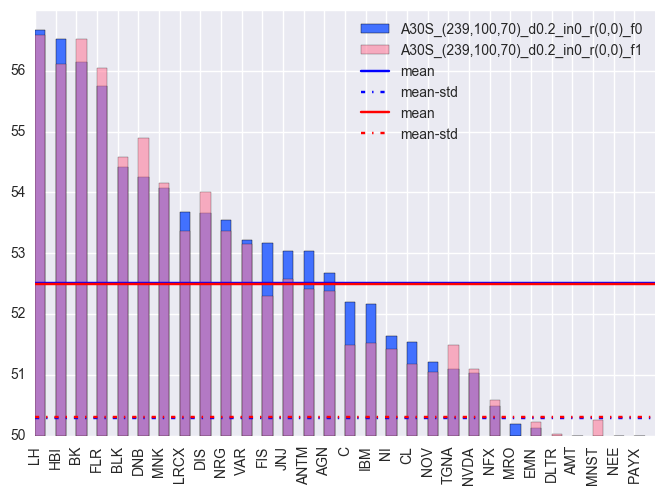

52.5206547907  |  52.4913830434
50.298282362  |  50.3045760198


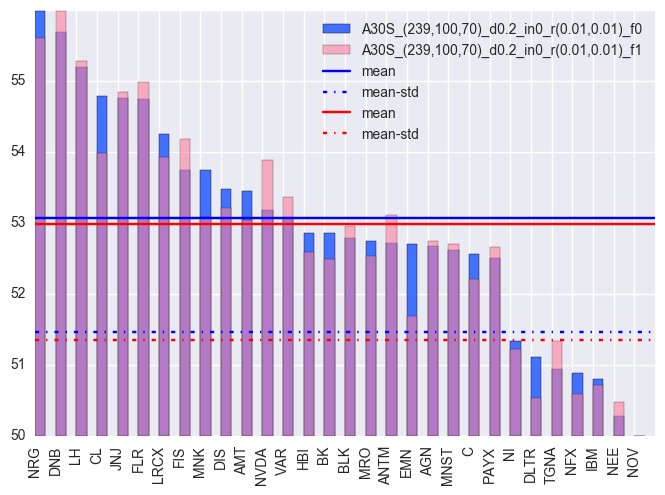

53.0646865073  |  52.9828261731
51.4655838378  |  51.3582402259


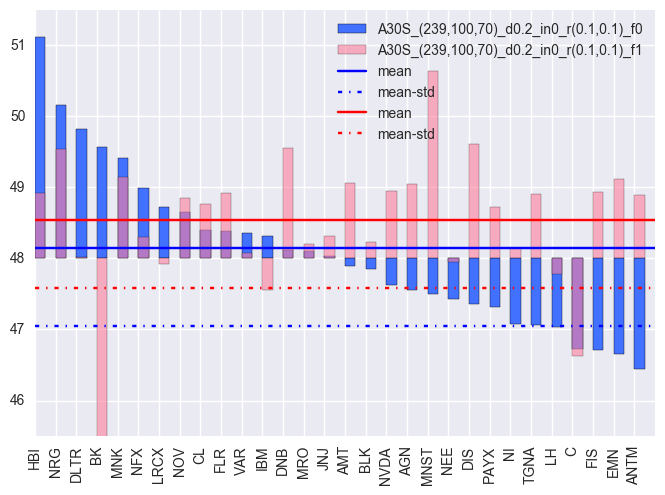

50.2875179536  |  51.0945553421
48.0945993109  |  49.1566908232


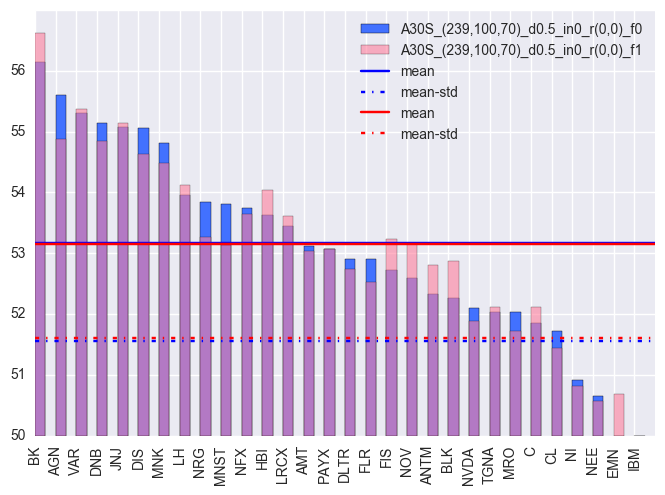

53.1771505973  |  53.1574906779
51.5524155721  |  51.6063703402


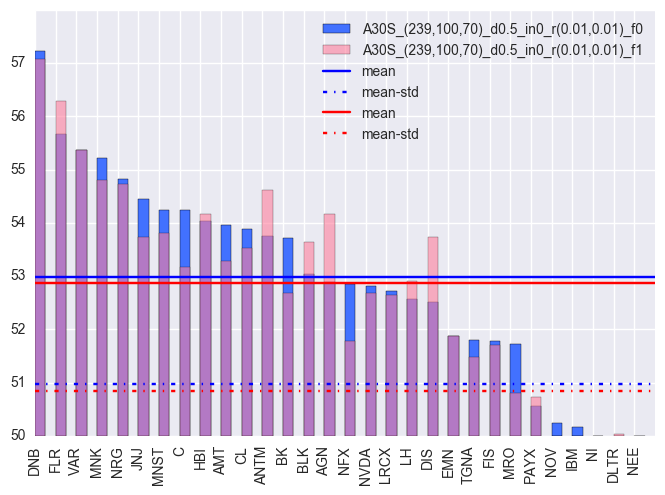

52.9824723217  |  52.8806212754
50.9789013283  |  50.8455691273


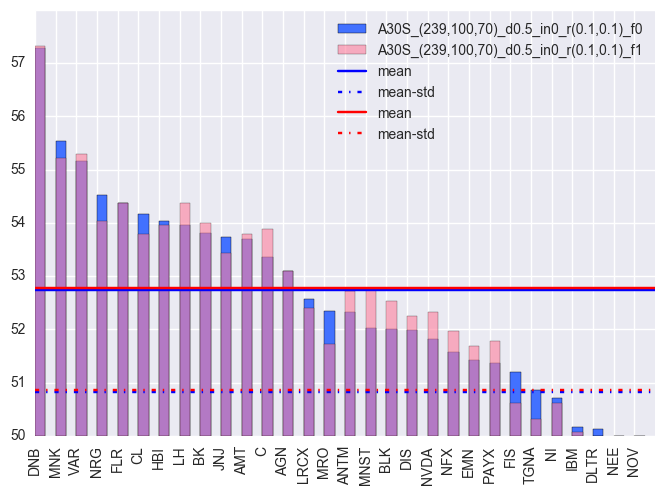

52.7344286426  |  52.7852120544
50.8261561166  |  50.8670256552


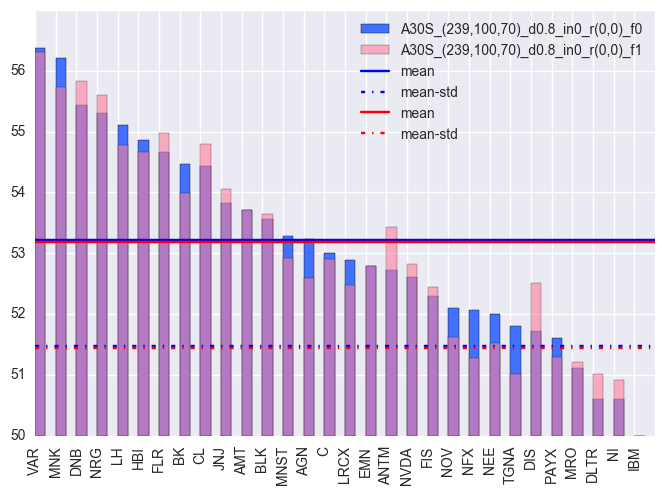

53.2174102456  |  53.1853485035
51.485597721  |  51.4424219844


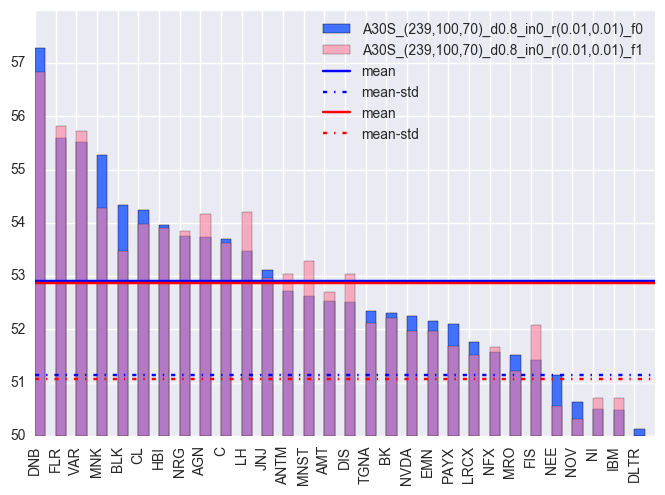

52.912770134  |  52.8655145174
51.1414952251  |  51.0696514913


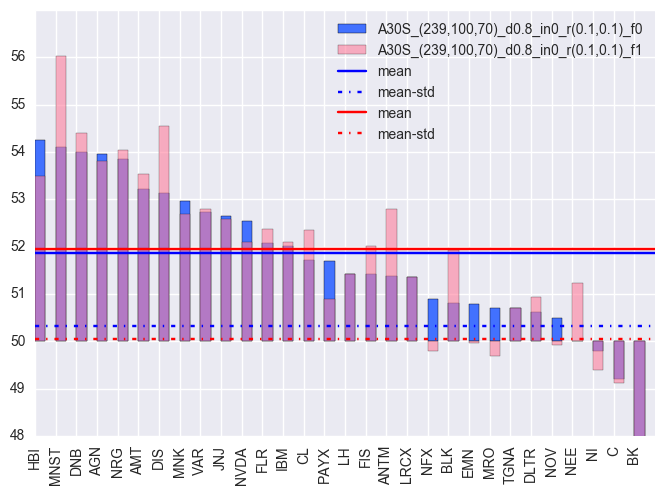

51.8685435091  |  51.9575646938
50.3206446667  |  50.0440691077


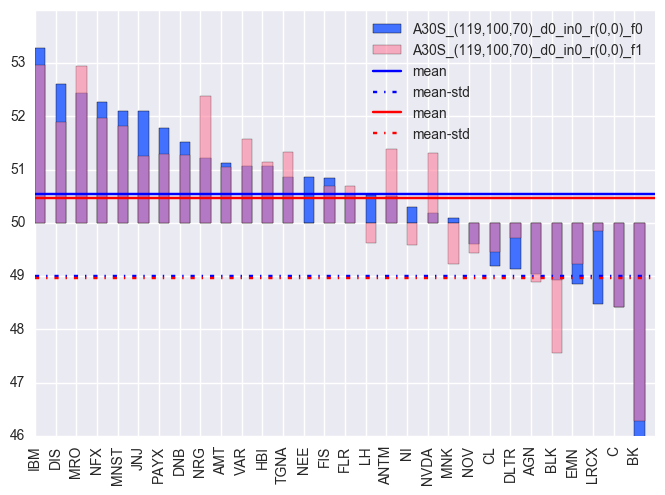

50.5418708938  |  50.4766314332
49.0017421859  |  48.9689741904


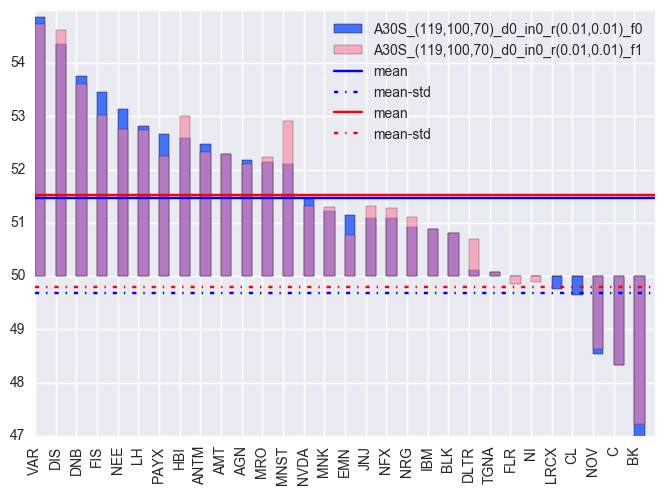

51.4669387292  |  51.5194263753
49.6799021796  |  49.7915543749


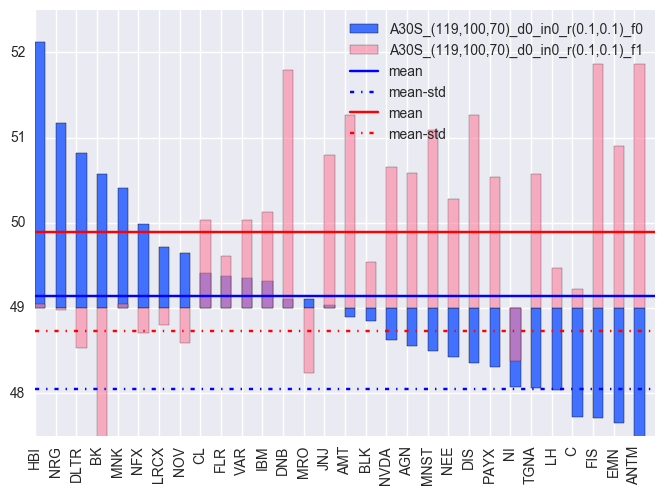

50.2875179536  |  51.7889626191
48.0945993109  |  49.4606161816


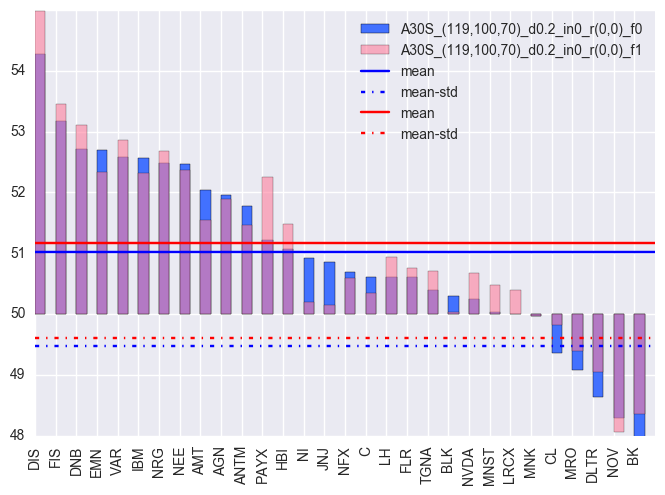

51.0239068495  |  51.1632987679
49.4713916982  |  49.6104212859


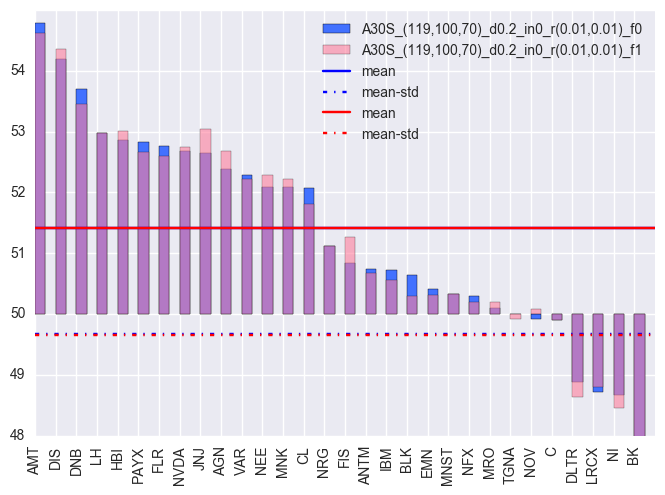

51.4125063996  |  51.4135238892
49.6741578841  |  49.6671879486


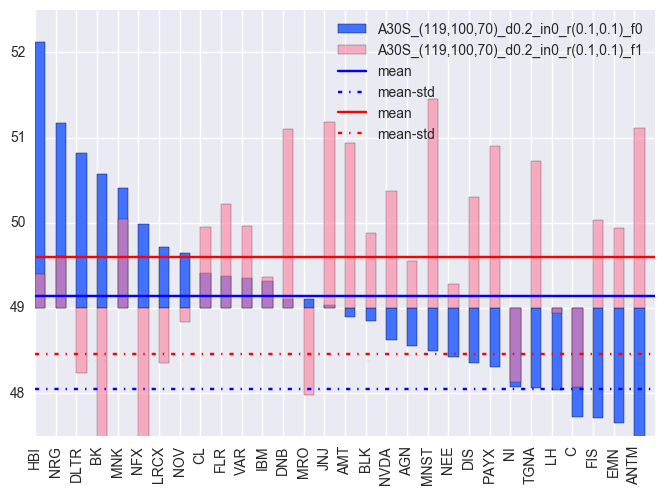

50.2875179536  |  51.1962423659
48.0945993109  |  48.9208420453


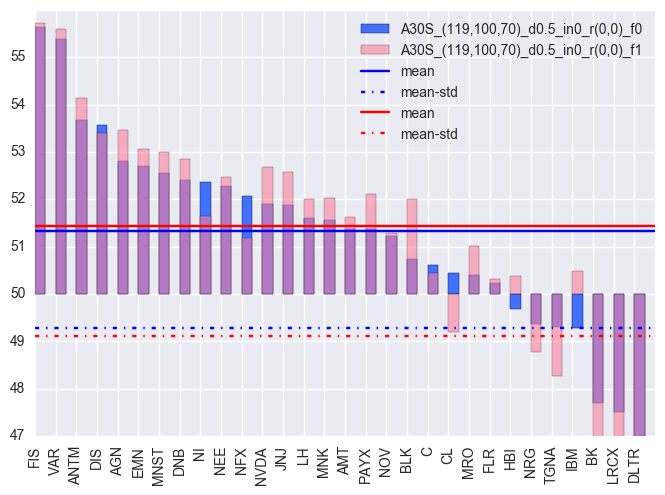

51.3187005571  |  51.4441227654
49.2828510401  |  49.1176671624


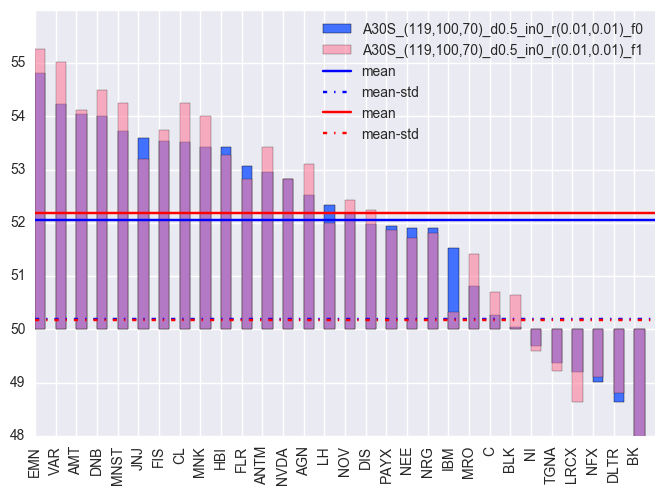

52.0514272645  |  52.1820999572
50.1891887617  |  50.1694541058


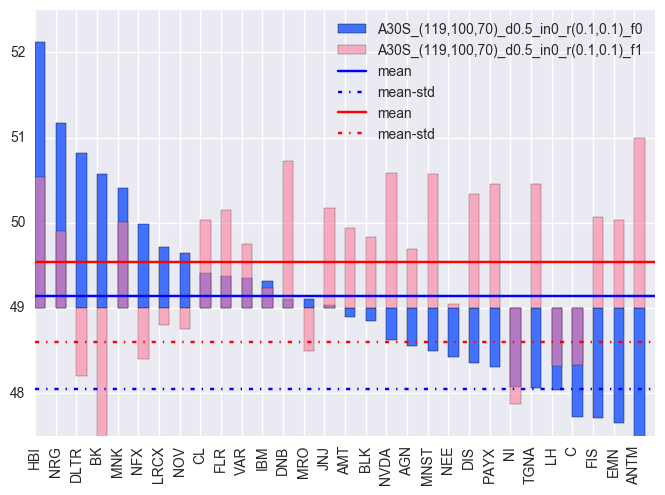

50.2875179536  |  51.0829750808
48.0945993109  |  49.2062797207


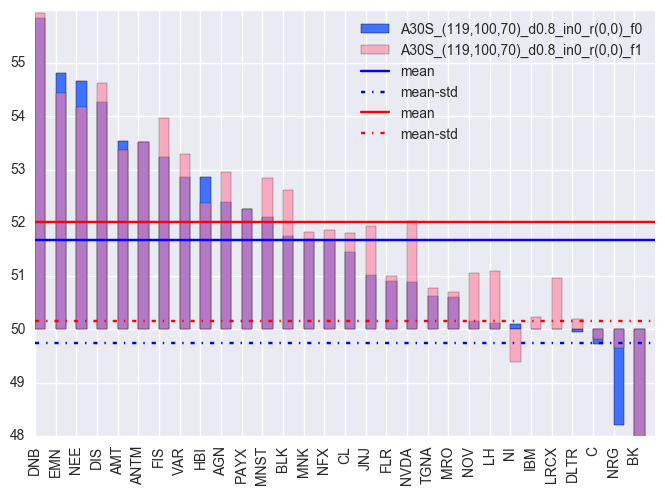

51.6873219404  |  52.0133255024
49.7524279515  |  50.1650947131


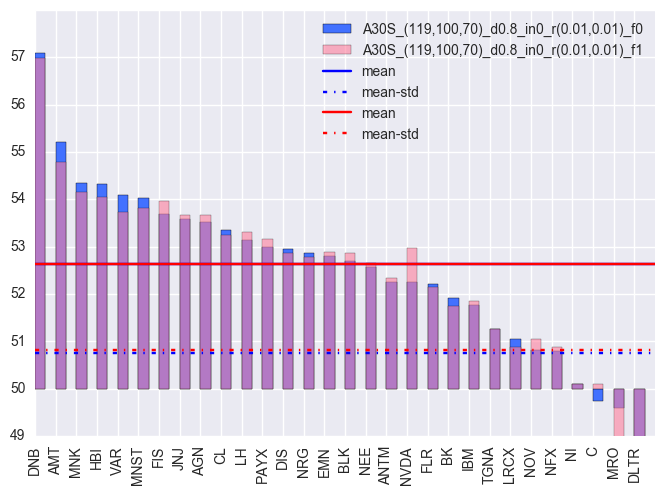

52.6427072119  |  52.6417015873
50.7597913177  |  50.8059866281


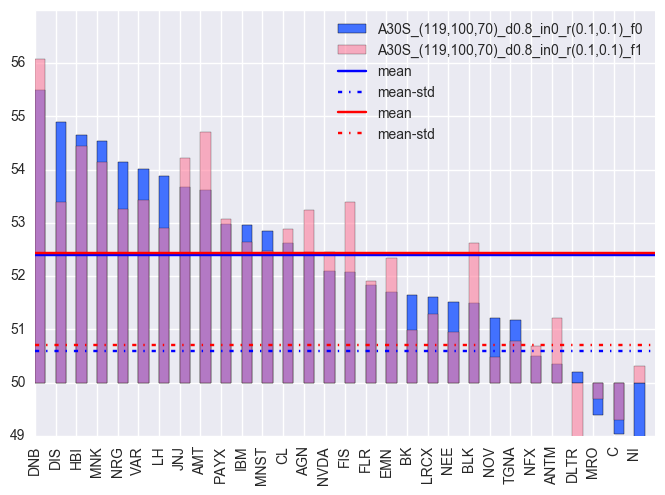

52.3948292869  |  52.4297585433
50.5957324652  |  50.6993940372


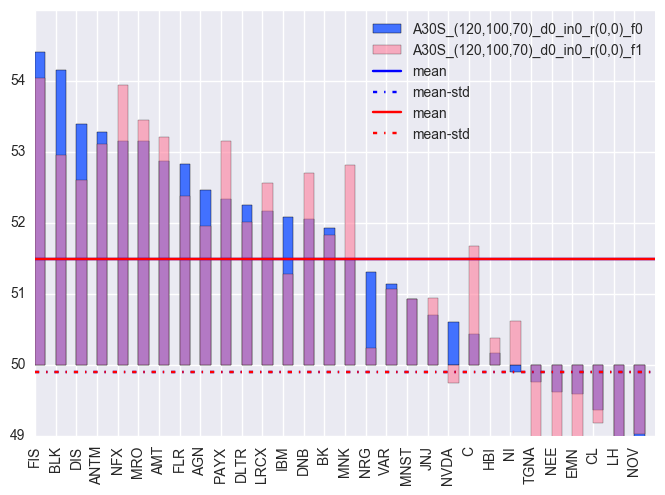

51.492660697  |  51.4881356512
49.9063100204  |  49.9079698228


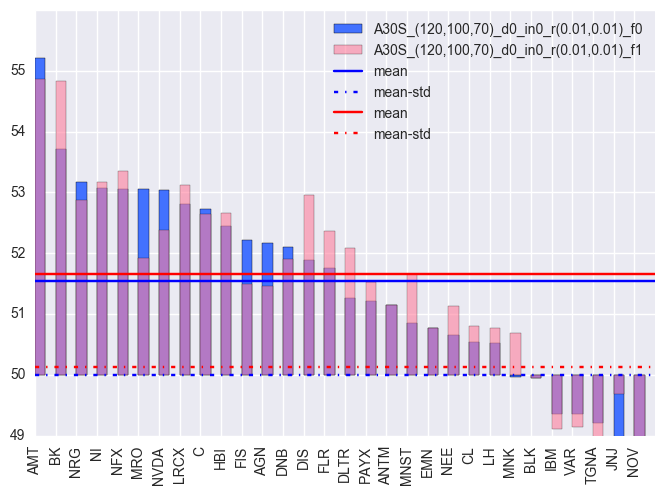

51.5456237749  |  51.66542225
50.0028807127  |  50.1338466087


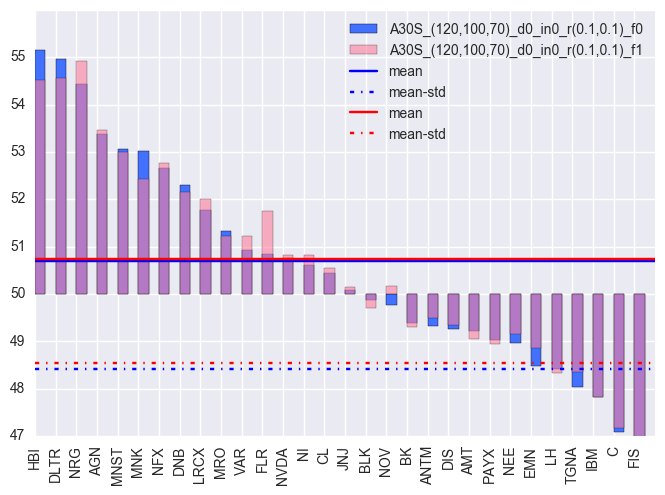

50.7010962618  |  50.7471801999
48.4164981694  |  48.5402663197


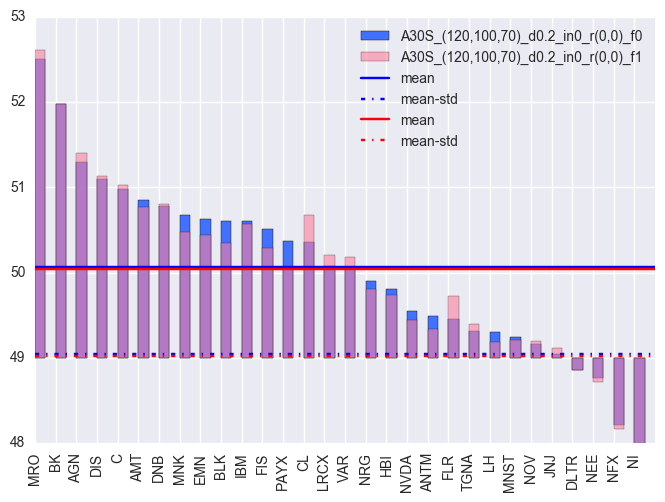

52.1272214182  |  52.0920789792
50.0773723101  |  50.0357476468


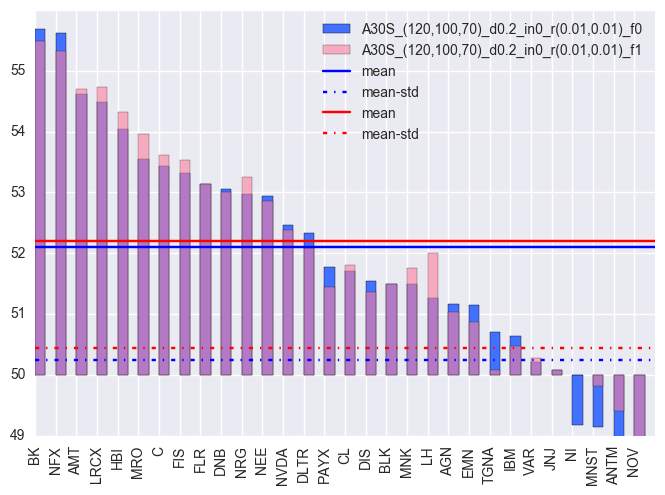

52.1012712817  |  52.2054964095
50.254885374  |  50.4451292861


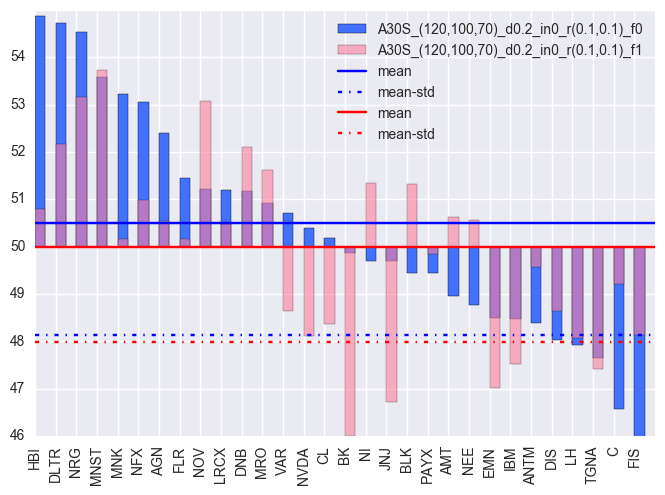

50.5017161733  |  49.9926306982
48.1375121809  |  47.9888343856


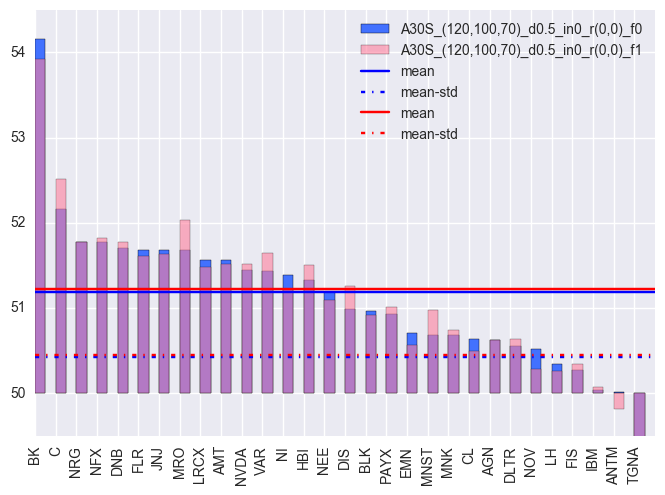

52.3827539232  |  52.4498868856
50.8473258208  |  50.8916994539


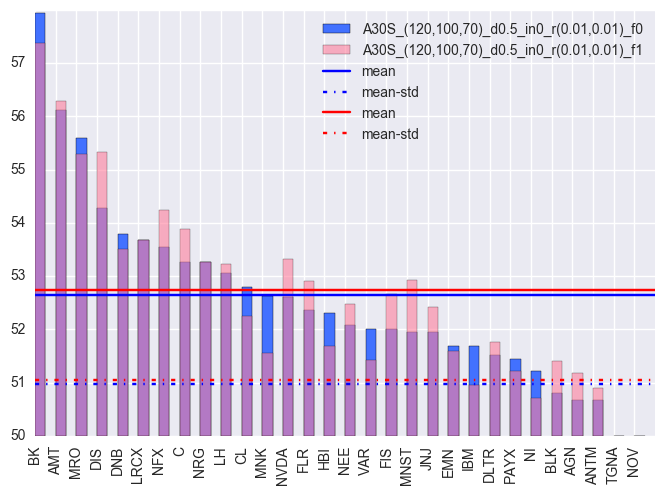

52.6422859245  |  52.7372992263
50.9792072493  |  51.0476518368


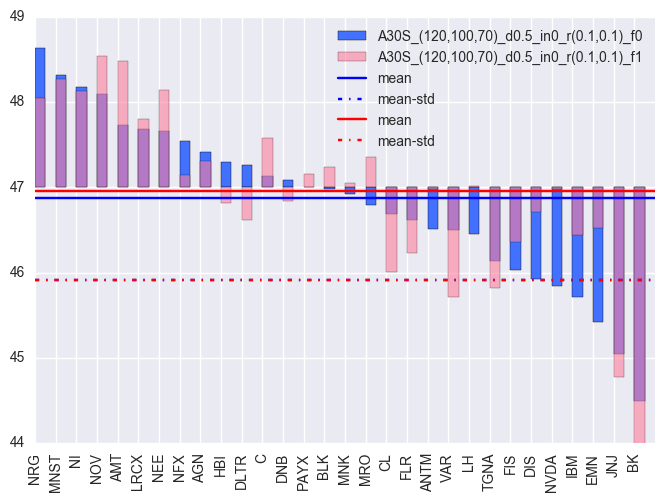

49.7451152165  |  49.9009842477
47.8129986323  |  47.8308067906


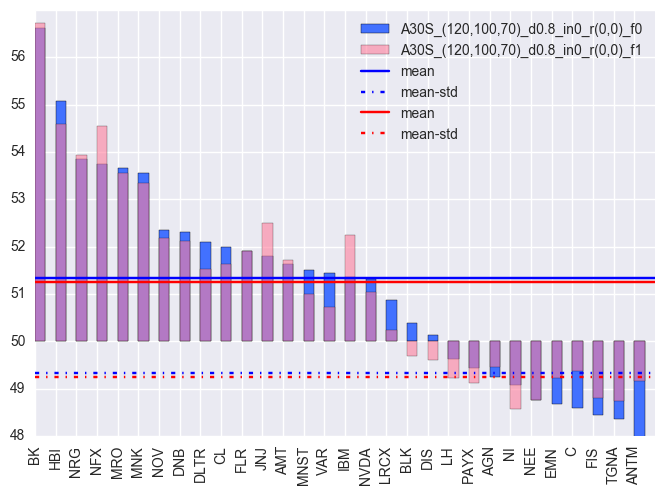

51.3331240649  |  51.2615558688
49.3211772968  |  49.2478672022


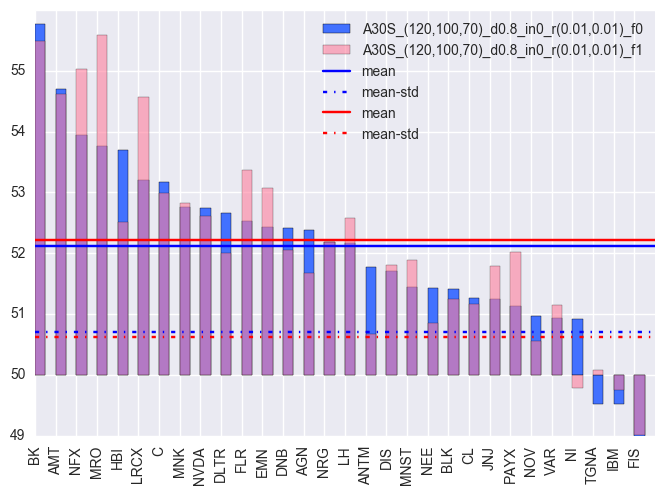

52.1287954169  |  52.2209380204
50.7063054269  |  50.6194615715


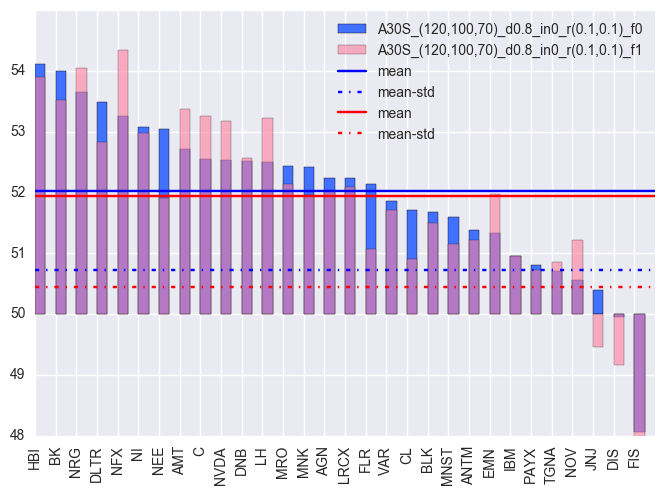

52.0302655211  |  51.9355377646
50.7274348732  |  50.4415264117


In [65]:
for i in range(0,len(a.experimentList70),2):
    comparisonGraph(a.experimentList70[i],a.experimentList70[i+1])
    print("===============================")
    print("%s  |  %s"%(a.experimentList70[i].getTestAccuracy(),a.experimentList70[i+1].getTestAccuracy()))
    print("%s  |  %s"%(a.experimentList70[i].getTestAccuracyMinusSigma(),a.experimentList70[i+1].getTestAccuracyMinusSigma()))

### Add denoising

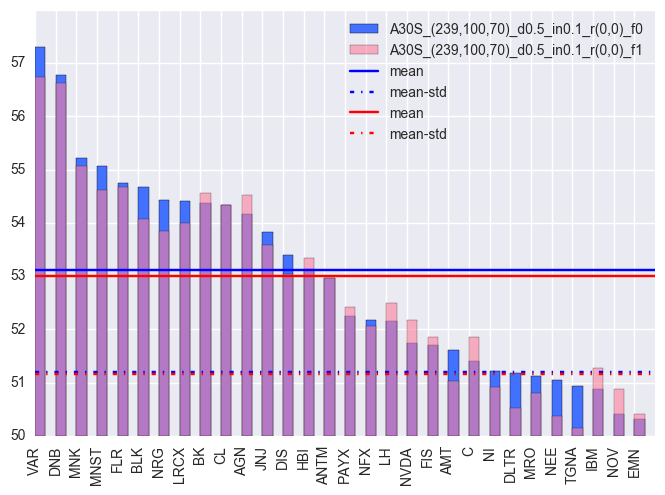

53.1084430517  |  53.0167907755
51.1927846687  |  51.1647091161


In [39]:
comparisonGraph(a.experimentList70_a_z_denoising[0],a.experimentList70_a_z_denoising[1])
print("===============================")
print("%s  |  %s"%(a.experimentList70_a_z_denoising[0].getTestAccuracy(),a.experimentList50_a_z_denoising[1].getTestAccuracy()))
print("%s  |  %s"%(a.experimentList70_a_z_denoising[0].getTestAccuracyMinusSigma(),a.experimentList70_a_z_denoising[1].getTestAccuracyMinusSigma()))

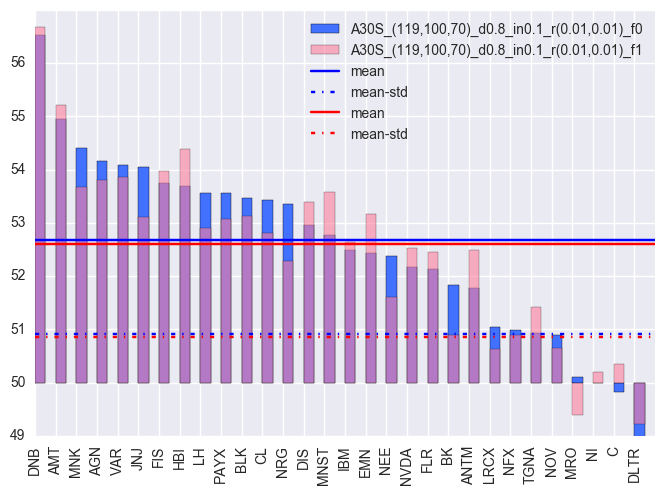

52.6835614109  |  52.6114366843
50.9075065915  |  50.857748376


In [62]:
comparisonGraph(a.experimentList70_a_denoising[0],a.experimentList70_a_denoising[1])
print("===============================")
print("%s  |  %s"%(a.experimentList70_a_denoising[0].getTestAccuracy(),a.experimentList70_a_denoising[1].getTestAccuracy()))
print("%s  |  %s"%(a.experimentList70_a_denoising[0].getTestAccuracyMinusSigma(),a.experimentList70_a_denoising[1].getTestAccuracyMinusSigma()))

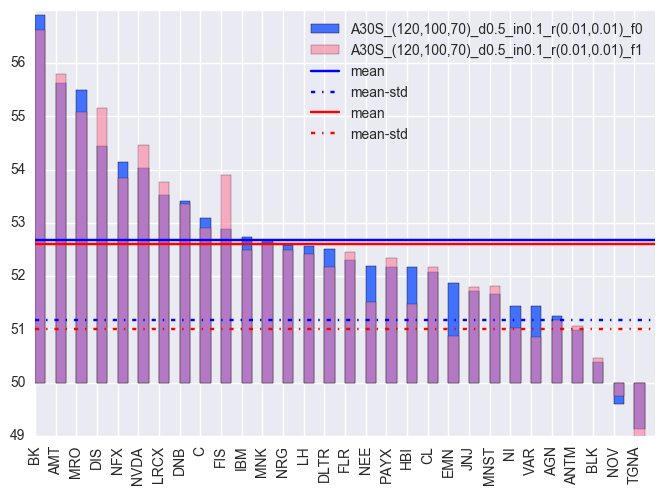

52.6821379959  |  52.6130586308
51.1846121828  |  51.0146802098


In [68]:
comparisonGraph(a.experimentList70_z_denoising[0],a.experimentList70_z_denoising[1])
print("===============================")
print("%s  |  %s"%(a.experimentList70_z_denoising[0].getTestAccuracy(),a.experimentList70_z_denoising[1].getTestAccuracy()))
print("%s  |  %s"%(a.experimentList70_z_denoising[0].getTestAccuracyMinusSigma(),a.experimentList70_z_denoising[1].getTestAccuracyMinusSigma()))

## Autoencoder 10

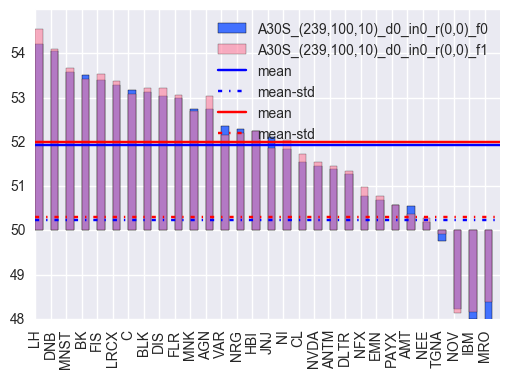

51.9305766324  |  51.9939273135
50.2374068571  |  50.3068824128


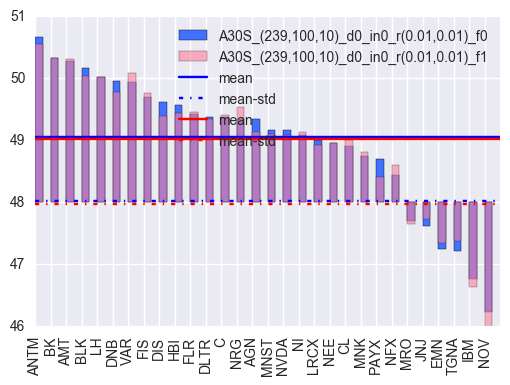

52.087660551  |  52.0252064764
50.0361867567  |  49.9305729124


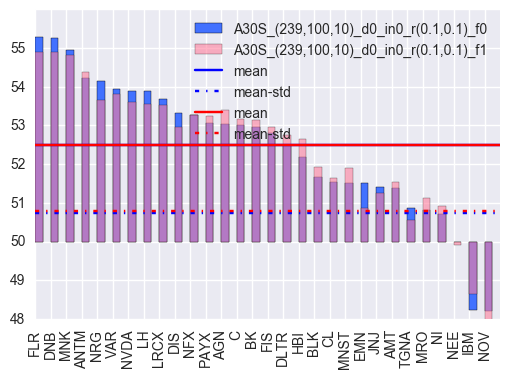

52.4930338166  |  52.479747188
50.7264479482  |  50.7993044494


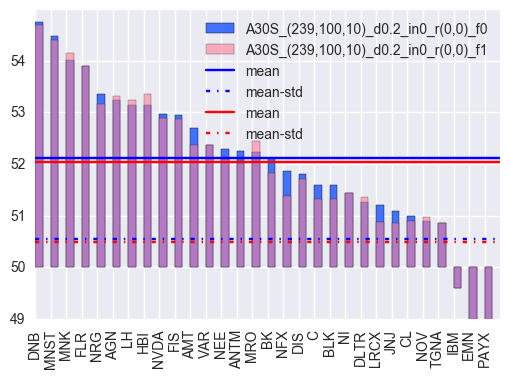

52.1113146614  |  52.0460758958
50.5525163295  |  50.4942125498


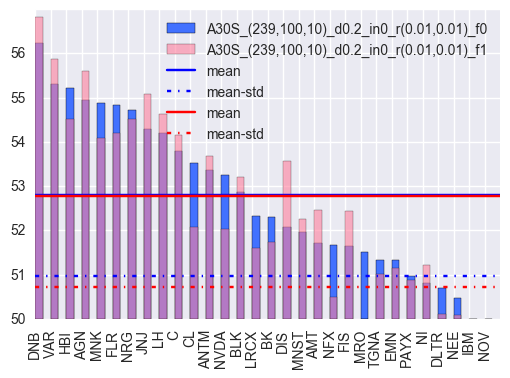

52.8107795292  |  52.7678671284
50.9643626294  |  50.7309663234


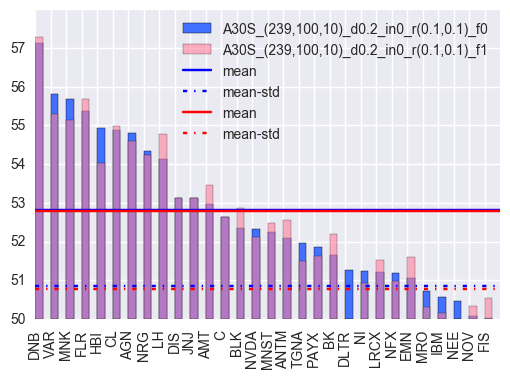

52.8238342295  |  52.7839991525
50.8520773513  |  50.7689045641


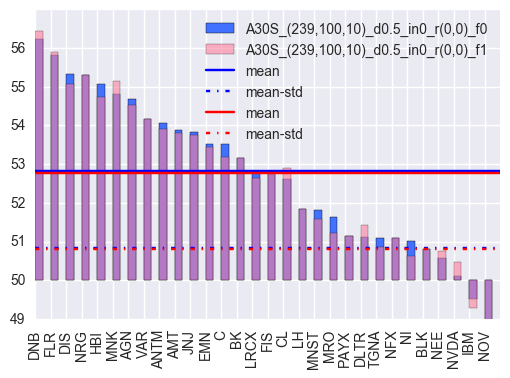

52.8118167243  |  52.7766838587
50.8355951953  |  50.7989415712


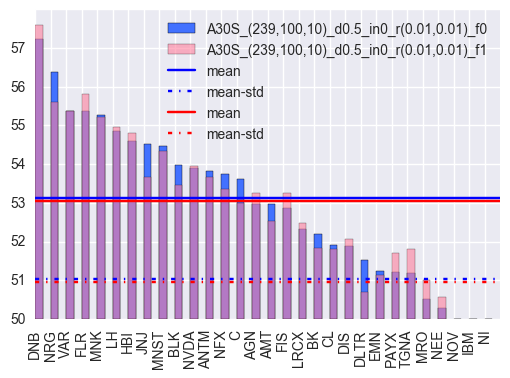

53.1115303045  |  53.0423838695
51.0211795143  |  50.9461512983


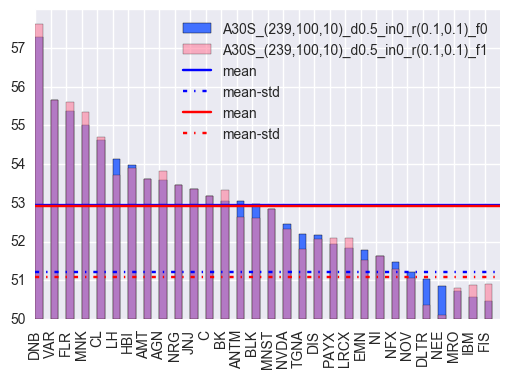

52.9356270061  |  52.9194948096
51.2044544142  |  51.0875483566


In [26]:
for i in range(0,len(a.experimentList10),2):
    comparisonGraph(a.experimentList10[i],a.experimentList10[i+1])
    print("===============================")
    print("%s  |  %s"%(a.experimentList10[i].getTestAccuracy(),a.experimentList10[i+1].getTestAccuracy()))
    print("%s  |  %s"%(a.experimentList10[i].getTestAccuracyMinusSigma(),a.experimentList10[i+1].getTestAccuracyMinusSigma()))

## Select best ones

In [27]:
best_30_a = a.experimentList30_a_denoising[0]
best_30_z = a.experimentList30_z_denoising[0]
best_30_a_z = a.experimentList30_a_z_denoising[0]
best_50_a = a.experimentList50[68]
best_50_z = a.experimentList50[9]
best_50_a_z = a.experimentList50_a_z_denoising[0]
best_70_a = a.experimentList70_a_denoising[0]
best_70_z = a.experimentList70[63]
best_70_a_z = a.experimentList70[13]
best_10_a_z = a.experimentList10[14]

In [28]:
for b in [best_30_a, best_30_z, best_30_a_z, best_50_a, best_50_z, best_50_a_z, best_70_a, best_70_z, best_70_a_z,best_10_a_z]:
    print(b.methodName)

A30S_(119,100,30)_d0_in0.1_r(0.1,0.1)_f0
A30S_(120,100,30)_d0.5_in0.1_r(0.01,0.01)_f0
A30S_(239,100,30)_d0.5_in0.1_r(0.01,0.01)_f0
A30S_(119,100,50)_d0.8_in0_r(0.01,0.01)_f0
A30S_(120,100,50)_d0.2_in0_r(0.01,0.01)_f1
A30S_(239,100,50)_d0.5_in0.1_r(0.01,0.01)_f0
A30S_(119,100,70)_d0.8_in0.1_r(0.01,0.01)_f0
A30S_(120,100,70)_d0.5_in0_r(0.01,0.01)_f1
A30S_(239,100,70)_d0.5_in0_r(0,0)_f1
A30S_(239,100,10)_d0.5_in0_r(0.01,0.01)_f0


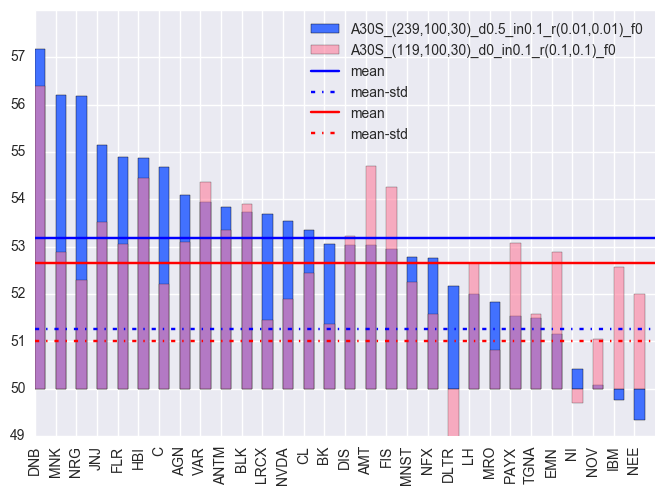

53.1865812263  |  52.6589000849
51.2617187369  |  51.001665425


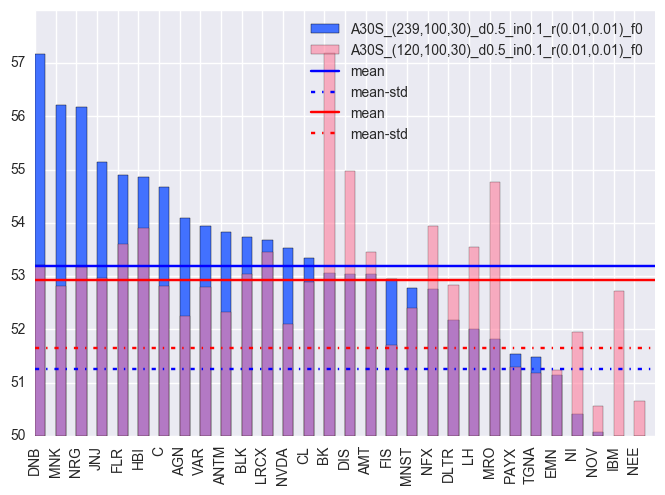

53.1865812263  |  52.92438983
51.2617187369  |  51.6607345865


In [32]:
comparisonGraph(best_30_a_z,best_30_a)
print("===============================")
print("%s  |  %s"%(best_30_a_z.getTestAccuracy(),best_30_a.getTestAccuracy()))
print("%s  |  %s"%(best_30_a_z.getTestAccuracyMinusSigma(),best_30_a.getTestAccuracyMinusSigma()))
comparisonGraph(best_30_a_z,best_30_z)
print("===============================")
print("%s  |  %s"%(best_30_a_z.getTestAccuracy(),best_30_z.getTestAccuracy()))
print("%s  |  %s"%(best_30_a_z.getTestAccuracyMinusSigma(),best_30_z.getTestAccuracyMinusSigma()))

## Ensemble

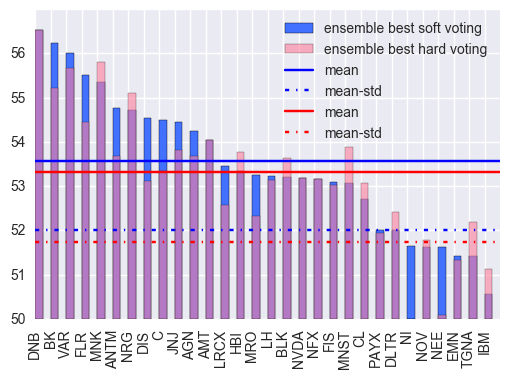

53.5572663607  |  53.308925909
52.0175178807  |  51.7444108649


'\ncomparisonGraph(a.acc_autoencoder_logit_ensemble[0],a.acc_autoencoder_logit_ensemble[2])\nprint("===============================")\nprint("%s  |  %s"%(a.acc_autoencoder_logit_ensemble[0].getTestAccuracy(),a.acc_autoencoder_logit_ensemble[2].getTestAccuracy()))\nprint("%s  |  %s"%(a.acc_autoencoder_logit_ensemble[0].getTestAccuracyMinusSigma(),a.acc_autoencoder_logit_ensemble[2].getTestAccuracyMinusSigma()))\n'

In [30]:
a = accuracies()
comparisonGraph(a.acc_autoencoder_logit_ensemble[0],a.acc_autoencoder_logit_ensemble[1])
print("===============================")
print("%s  |  %s"%(a.acc_autoencoder_logit_ensemble[0].getTestAccuracy(),a.acc_autoencoder_logit_ensemble[1].getTestAccuracy()))
print("%s  |  %s"%(a.acc_autoencoder_logit_ensemble[0].getTestAccuracyMinusSigma(),a.acc_autoencoder_logit_ensemble[1].getTestAccuracyMinusSigma()))
'''
comparisonGraph(a.acc_autoencoder_logit_ensemble[0],a.acc_autoencoder_logit_ensemble[2])
print("===============================")
print("%s  |  %s"%(a.acc_autoencoder_logit_ensemble[0].getTestAccuracy(),a.acc_autoencoder_logit_ensemble[2].getTestAccuracy()))
print("%s  |  %s"%(a.acc_autoencoder_logit_ensemble[0].getTestAccuracyMinusSigma(),a.acc_autoencoder_logit_ensemble[2].getTestAccuracyMinusSigma()))
'''

In [8]:
for b in [best_30_a, best_30_z, best_30_a_z, best_50_a, best_50_z, best_50_a_z, best_70_a, best_70_z, best_70_a_z]:
    print("%s  |  %s"%(b.getTestAccuracy(),b.getTestAccuracyMinusSigma()))

52.6589000849  |  51.001665425
52.92438983  |  51.6607345865
53.1865812263  |  51.2617187369
52.5572860968  |  50.8765455354
53.0066884656  |  51.5044564837
53.0385623134  |  51.0869207803
52.6835614109  |  50.9075065915
52.7372992263  |  51.0476518368
53.1574906779  |  51.6063703402
